In [71]:
# cuadernos/001_eda_cali_sitios.ipynb

# --- Importaci√≥n de Librer√≠as ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import json
import os
import regex
import regex as re
import re # Usamos 're' para operaciones b√°sicas, 'regex' no es estrictamente necesario aqu√≠
import unicodedata # Para normalizar y quitar acentos
import ast

# --- Configuraci√≥n de Logging ---
# Asegura que no se dupliquen los handlers si se corre la celda m√∫ltiples veces
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# Configura el logging para guardar en archivo y mostrar en consola
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("001_normalizacion_sitios.log"),
        logging.StreamHandler()
    ]
)

# --- Configuraci√≥n de Pandas ---
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 1000) 

logging.info("Librer√≠as importadas y configuraci√≥n inicial completada.")

2025-10-08 23:29:40,102 - INFO - Librer√≠as importadas y configuraci√≥n inicial completada.


### Gastronomia


Celda 2: Carga de Datos


In [72]:
# --- Carga del Dataset ---
# Para analizar otro a√±o, simplemente cambia el nombre del archivo en esta variable.
# Esto hace que el resto del cuaderno sea reutilizable.
try:
    data_folder = '../datos_brutos/Local_(Cali)/'
    file_name = '000_Local_Cali_Gastronomia.csv'
    file_path = os.path.join(data_folder, file_name)
    
    df_sitios = pd.read_csv(file_path, encoding='latin1', sep=';')
    logging.info(f"Dataset '{file_name}' cargado exitosamente.")
except FileNotFoundError:
    logging.error(f"Error: El archivo no se encontr√≥ en la ruta: {file_path}")

2025-10-08 23:29:40,120 - INFO - Dataset '000_Local_Cali_Gastronomia.csv' cargado exitosamente.


In [73]:
df_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nombre              57 non-null     object
 1   Tel√©fono            57 non-null     int64 
 2   Correo electr√≥nico  57 non-null     object
 3   Direccion           57 non-null     object
 4   Categoria           57 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.4+ KB


Celda 3: 1. Primer Vistazo a los Datos (.head())


In [74]:
# Muestra las primeras 5 filas para una inspecci√≥n visual inicial.
logging.info("1. Mostrando las primeras filas del DataFrame:")
print(df_sitios.head())

2025-10-08 23:29:40,138 - INFO - 1. Mostrando las primeras filas del DataFrame:


                                         Nombre    Tel√©fono                  Correo electr√≥nico            Direccion    Categoria
0  HAMBURGUESAS EL CORRAL SUCURSAL SANTA MONICA  3185778732  notifica@alimentosalconsumidor.com     CL 28N No. 6A 16  RESTAURANTE
1                                        CBC 43  6017434105             carlosgarcia@cbc.com.co      AV 6 No. 15N 61  RESTAURANTE
2         KOKORIKO PASEO BOLIVAR AVE. SEXTACALI     8612233     representacionlegal@grupoiga.co   AV 4N No. 10N 130   RESTAURANTE
3                               KOKORIKO No. 11     8612233     representacionlegal@grupoiga.co  CL 5 No. 45 20 LC 1  RESTAURANTE
4                                  TIZONES LTDA     6536119      restaurantetizones@hotmail.com    AV 6B No. 28N  57  RESTAURANTE


Celda 4: 2. Listado de Columnas


In [75]:
# Obtiene una lista con todos los nombres de las columnas.
logging.info("2. Listado de columnas disponibles:")
print(list(df_sitios.columns))

2025-10-08 23:29:40,147 - INFO - 2. Listado de columnas disponibles:


['Nombre', 'Tel√©fono', 'Correo electr√≥nico', 'Direccion', 'Categoria']


In [76]:
# Analiza la distribuci√≥n de las categor√≠as m√°s importantes.
# Ahora podemos analizar las categor√≠as ordenadas tambi√©n.
logging.info("7. Distribuci√≥n de valores para categor√≠as clave en el DataFrame limpio:")

# Seleccionamos un conjunto representativo de columnas categ√≥ricas.
columnas_clave_limpias = ['Nombre', 'Tel√©fono', 'Correo electr√≥nico', 'Direccion', 'Categoria']

for col in columnas_clave_limpias:
    if col in df_sitios.columns:
        print(f"\n--- Distribuci√≥n para '{col}' ---")
        # Usamos normalize=True para ver porcentajes, y head(10) para no saturar la salida.
        print(df_sitios[col].value_counts(normalize=True).head(50) * 100)
    else:
        logging.warning(f"La columna clave '{col}' no se encontr√≥ en el DataFrame.")

2025-10-08 23:29:40,155 - INFO - 7. Distribuci√≥n de valores para categor√≠as clave en el DataFrame limpio:



--- Distribuci√≥n para 'Nombre' ---
Nombre
HAMBURGUESAS EL CORRAL SUCURSAL SANTA MONICA       1.754
CBC 43                                             1.754
KOKORIKO PASEO BOLIVAR AVE. SEXTACALI              1.754
KOKORIKO No. 11                                    1.754
TIZONES LTDA                                       1.754
CBC 45                                             1.754
KOKORIKO No. 8                                     1.754
EL SANDWICH CUBANO  3                              1.754
LE√ëOS & CARBON SUCURSAL JUMBO CHIPICHAPE           1.754
L&C SUCURSAL UNICENTRO II                          1.754
L&C SUCURSAL UNICENTRO I                           1.754
RESTAURANTE Y CENADERO APOLO                       1.754
PIZZERIA Y RESTAURANTE SALERNO                     1.754
KAREN'S PIZZA NO.2                                 1.754
KAREN'S PIZZA  4                                   1.754
RESTAURANTE ARGENTINO  HORNEADA                    1.754
EL SANDWICH CUBANO CENTRO COMERCIAL CHIPICH

### Alojamiento

Celda 2: Carga de Datos


In [77]:
# --- Carga del Dataset ---
# Para analizar otro a√±o, simplemente cambia el nombre del archivo en esta variable.
# Esto hace que el resto del cuaderno sea reutilizable.
try:
    data_folder = '../datos_brutos/Local_(Cali)/'
    file_name = '001_Local_Cali_Alojamiento.csv'
    file_path = os.path.join(data_folder, file_name)
    
    df_sitios = pd.read_csv(file_path, encoding='latin1', sep=';')
    logging.info(f"Dataset '{file_name}' cargado exitosamente.")
except FileNotFoundError:
    logging.error(f"Error: El archivo no se encontr√≥ en la ruta: {file_path}")

2025-10-08 23:29:40,170 - INFO - Dataset '001_Local_Cali_Alojamiento.csv' cargado exitosamente.


In [78]:
df_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Categoria                  356 non-null    object
 1   Nombre de establecimiento  356 non-null    object
 2   Tel√©fono                   356 non-null    int64 
 3   Correo electr√≥nico         356 non-null    object
 4   Direccion                  356 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.0+ KB


Celda 3: 1. Primer Vistazo a los Datos (.head())


In [79]:
# Muestra las primeras 5 filas para una inspecci√≥n visual inicial.
logging.info("1. Mostrando las primeras filas del DataFrame:")
print(df_sitios.head())

2025-10-08 23:29:40,188 - INFO - 1. Mostrando las primeras filas del DataFrame:


  Categoria           Nombre de establecimiento    Tel√©fono                      Correo electr√≥nico                    Direccion
0     HOTEL                      HOTEL OBELISCO  6028933019          finanzas@hotelobeliscocali.com  AV COLOMBIA No. 4 OESTE  49
1     HOTEL                       NH ROYAL CALI  3132461682         impuestoscolombia@nh-hotels.com          CR 100B No. 11A  99
2     HOTEL                     HOTEL DANN CALI     8933000            ed-continental@emcali.net.co               CR 1 No. 1  40
3     HOTEL  CASA SANTA MONICA SU HOGAR EN CALI  6026685180  administracion@casasantamonicacali.com             CL 23N No. 8N 34
4     HOTEL                  HOTEL GRANADA REAL     6614920        contador@hotelgranadareal.com.co            AV 8N No. 15AN 31


Celda 4: 2. Listado de Columnas


In [80]:
# Analiza la distribuci√≥n de las categor√≠as m√°s importantes.
# Ahora podemos analizar las categor√≠as ordenadas tambi√©n.
logging.info("7. Distribuci√≥n de valores para categor√≠as clave en el DataFrame limpio:")

# Seleccionamos un conjunto representativo de columnas categ√≥ricas.
columnas_clave_limpias = ['Categoria', 'Nombre de establecimiento', 'Tel√©fono', 'Correo electr√≥nico', 'Direccion']

for col in columnas_clave_limpias:
    if col in df_sitios.columns:
        print(f"\n--- Distribuci√≥n para '{col}' ---")
        # Usamos normalize=True para ver porcentajes, y head(10) para no saturar la salida.
        print(df_sitios[col].value_counts(normalize=True).head(50) * 100)
    else:
        logging.warning(f"La columna clave '{col}' no se encontr√≥ en el DataFrame.")

2025-10-08 23:29:40,198 - INFO - 7. Distribuci√≥n de valores para categor√≠as clave en el DataFrame limpio:



--- Distribuci√≥n para 'Categoria' ---
Categoria
HOTEL               57.584
APARTAHOTEL         18.820
HOSTAL              18.820
CENTRO VACACIONAL    1.404
GLAMPING             1.404
CAMPAMENTO           0.843
ALBERGUE             0.843
REFUGIO              0.281
Name: proportion, dtype: float64

--- Distribuci√≥n para 'Nombre de establecimiento' ---
Nombre de establecimiento
HOTEL CALIMA REAL                                 0.562
APARTA HOTEL WALVE                                0.562
HOTEL ROOM 2                                      0.562
HOTEL AW PUERTA DE SAN CAYETANO                   0.562
LUXURY RECOVERY HOUSE N.2                         0.562
ARISHA HOTEL SAS                                  0.281
ECO HOTEL COLOMBOHOLAND√âS                         0.281
HOTEL BLACK AND WHITE CALI                        0.281
LA VAINA HOSTEL CALI                              0.281
RESERVA NATURAL ARI MUNANI                        0.281
HOSPEDAJE LA CASA DE LOS SUE√ëOS                   0.281
H

In [81]:
# Obtiene una lista con todos los nombres de las columnas.
logging.info("2. Listado de columnas disponibles:")
print(list(df_sitios.columns))

2025-10-08 23:29:40,211 - INFO - 2. Listado de columnas disponibles:


['Categoria', 'Nombre de establecimiento', 'Tel√©fono', 'Correo electr√≥nico', 'Direccion']


### Iconos Turisticos


Celda 2: Carga de Datos


In [82]:
# --- Carga del Dataset ---
# Para analizar otro a√±o, simplemente cambia el nombre del archivo en esta variable.
# Esto hace que el resto del cuaderno sea reutilizable.
try:
    data_folder = '../datos_brutos/Local_(Cali)/'
    file_name = '002_Local_Cali_Iconos_Turisticos.csv'
    file_path = os.path.join(data_folder, file_name)
    
    df_sitios = pd.read_csv(file_path, encoding='latin1', sep=';')
    logging.info(f"Dataset '{file_name}' cargado exitosamente.")
except FileNotFoundError:
    logging.error(f"Error: El archivo no se encontr√≥ en la ruta: {file_path}")

2025-10-08 23:29:40,222 - INFO - Dataset '002_Local_Cali_Iconos_Turisticos.csv' cargado exitosamente.


Celda 3: 1. Primer Vistazo a los Datos (.head())


In [83]:
df_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NOMBRE                           89 non-null     object 
 1   CATEGORIA                        73 non-null     object 
 2   SUBCATEGORIA                     73 non-null     object 
 3   RESE√ëA HISTORICA                 80 non-null     object 
 4   DIRECCION                        81 non-null     object 
 5      NUMERO DE TELEFONO            32 non-null     object 
 6   HORARIO                          75 non-null     object 
 7   PAGINA WEB O CORREO ELECTRONICO  48 non-null     object 
 8   PRECIO                           74 non-null     object 
 9   ACCESIBILIDAD (discapacitados)   87 non-null     object 
 10  RUTAS DEL MIO CERCANAS           88 non-null     object 
 11  PARQUEADEROS                     87 non-null     object 
 12  RECOMENDACIONES        

In [84]:
# --- Celda de Verificaci√≥n: Contar Valores √önicos ANTES de Eliminar ---

logging.info("Calculando el conteo de valores √∫nicos para todas las columnas, ANTES de eliminar las 'Unnamed'.")
print("--- Tabla de Conteo de Valores √önicos por Columna (Incluyendo 'Unnamed') ---")

# 1. Calcular el conteo de valores √∫nicos para cada columna
conteo_unicos = df_sitios.nunique()

# 2. Convertir la Serie resultante a un DataFrame para una mejor visualizaci√≥n
tabla_conteo_unicos = pd.DataFrame(conteo_unicos, columns=['conteo_valores_unicos'])

# 3. Ordenar la tabla para ver las columnas m√°s diversas primero
tabla_conteo_unicos.sort_values(by='conteo_valores_unicos', ascending=False, inplace=True)

# 4. Mostrar la tabla completa
print(tabla_conteo_unicos)

logging.info("Tabla de conteo de valores √∫nicos generada.")

2025-10-08 23:29:40,244 - INFO - Calculando el conteo de valores √∫nicos para todas las columnas, ANTES de eliminar las 'Unnamed'.
2025-10-08 23:29:40,248 - INFO - Tabla de conteo de valores √∫nicos generada.


--- Tabla de Conteo de Valores √önicos por Columna (Incluyendo 'Unnamed') ---
                                 conteo_valores_unicos
NOMBRE                                              82
DIRECCION                                           81
RESE√ëA HISTORICA                                    80
HORARIO                                             60
RUTAS DEL MIO CERCANAS                              58
PRECIO                                              34
PARQUEADEROS                                        27
PAGINA WEB O CORREO ELECTRONICO                     26
   NUMERO DE TELEFONO                               25
SUBCATEGORIA                                        17
RECOMENDACIONES                                     13
ACCESIBILIDAD (discapacitados)                      10
CATEGORIA                                            6
RESPONSABLE                                          6
Unnamed: 14                                          0
Unnamed: 15                              

In [85]:
# --- Celda para Eliminar Columnas 'Unnamed' ---

logging.info("Iniciando la limpieza de columnas 'Unnamed' vac√≠as del DataFrame de sitios.")

# 1. Identificar las columnas a eliminar
# Creamos una lista con todas las columnas cuyo nombre comienza con 'Unnamed'
columnas_unnamed_a_eliminar = [col for col in df_sitios.columns if 'Unnamed' in col]

if columnas_unnamed_a_eliminar:
    logging.info(f"Se encontraron {len(columnas_unnamed_a_eliminar)} columnas 'Unnamed' para eliminar.")
    print(f"Columnas a eliminar: {columnas_unnamed_a_eliminar}")

    # 2. Eliminar las columnas identificadas
    df_sitios.drop(columns=columnas_unnamed_a_eliminar, inplace=True)
    
    logging.info("Columnas 'Unnamed' eliminadas exitosamente.")
    
    # 3. Verificaci√≥n final
    print("\n--- Verificaci√≥n: Informaci√≥n del DataFrame despu√©s de la eliminaci√≥n ---")
    df_sitios.info()
else:
    logging.info("No se encontraron columnas 'Unnamed' para eliminar.")
    print("No se encontraron columnas 'Unnamed' en el DataFrame.")

2025-10-08 23:29:40,256 - INFO - Iniciando la limpieza de columnas 'Unnamed' vac√≠as del DataFrame de sitios.
2025-10-08 23:29:40,258 - INFO - Se encontraron 16 columnas 'Unnamed' para eliminar.
2025-10-08 23:29:40,259 - INFO - Columnas 'Unnamed' eliminadas exitosamente.


Columnas a eliminar: ['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29']

--- Verificaci√≥n: Informaci√≥n del DataFrame despu√©s de la eliminaci√≥n ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   NOMBRE                           89 non-null     object
 1   CATEGORIA                        73 non-null     object
 2   SUBCATEGORIA                     73 non-null     object
 3   RESE√ëA HISTORICA                 80 non-null     object
 4   DIRECCION                        81 non-null     object
 5      NUMERO DE TELEFONO            32 non-null     object
 6   HORARIO                          75 non-null     object
 7   P

In [86]:
# Analiza la distribuci√≥n de las categor√≠as m√°s importantes.
# Ahora podemos analizar las categor√≠as ordenadas tambi√©n.
logging.info("7. Distribuci√≥n de valores para categor√≠as clave en el DataFrame limpio:")

# Seleccionamos un conjunto representativo de columnas categ√≥ricas.
columnas_clave_limpias = ['NOMBRE', 'CATEGORIA', 'SUBCATEGORIA', 'RESE√ëA HISTORICA', 'DIRECCION', '   NUMERO DE TELEFONO', 'HORARIO', 'PAGINA WEB O CORREO ELECTRONICO', 'PRECIO', 'ACCESIBILIDAD (discapacitados) ', 'RUTAS DEL MIO CERCANAS', 'PARQUEADEROS', 'RECOMENDACIONES', 'RESPONSABLE']

for col in columnas_clave_limpias:
    if col in df_sitios.columns:
        print(f"\n--- Distribuci√≥n para '{col}' ---")
        # Usamos normalize=True para ver porcentajes, y head(10) para no saturar la salida.
        print(df_sitios[col].value_counts(normalize=True).head(50) * 100)
    else:
        logging.warning(f"La columna clave '{col}' no se encontr√≥ en el DataFrame.")

2025-10-08 23:29:40,271 - INFO - 7. Distribuci√≥n de valores para categor√≠as clave en el DataFrame limpio:



--- Distribuci√≥n para 'NOMBRE' ---
NOMBRE
NORTE                                            3.371
SUR                                              3.371
OESTE                                            2.247
CENTRO                                           2.247
PLAZOLETA JAIRO VARELA                           2.247
COMPLEJO LA MERCED                               1.124
BULEVAR DE LA AVENIDA COLOMBIA                   1.124
PARQUE PANAMERICANO (DE LAS BANDERAS)            1.124
BARRIO SAN ANTONIO                               1.124
TEATRO MUNICIPAL ENRIQUE BUENAVENTURA            1.124
MUSEO ARQUE√ìLOGICO LA MERCED                     1.124
MUSEO DE ARTE COLONIAL Y RELIGIOSO               1.124
MUSEO DE LA CINEMATOGRAF√çA CALIWOOD              1.124
MUSEO DEL ORO CALIMA                             1.124
PALACIO NACIONAL                                 1.124
ESTADIO PASCUAL GUERRERO                         1.124
LAS TRES CRUCES                                  1.124
PLAZA DE CAICEDO   

Celda 4: 2. Listado de Columnas


In [87]:
# Obtiene una lista con todos los nombres de las columnas.
logging.info("2. Listado de columnas disponibles:")
print(list(df_sitios.columns))

2025-10-08 23:29:40,295 - INFO - 2. Listado de columnas disponibles:


['NOMBRE', 'CATEGORIA', 'SUBCATEGORIA', 'RESE√ëA HISTORICA', 'DIRECCION', '   NUMERO DE TELEFONO', 'HORARIO', 'PAGINA WEB O CORREO ELECTRONICO', 'PRECIO', 'ACCESIBILIDAD (discapacitados) ', 'RUTAS DEL MIO CERCANAS', 'PARQUEADEROS', 'RECOMENDACIONES', 'RESPONSABLE']


### Sitios Turisticos


Celda 2: Carga de Datos


In [88]:
# --- Carga del Dataset ---
# Para analizar otro a√±o, simplemente cambia el nombre del archivo en esta variable.
# Esto hace que el resto del cuaderno sea reutilizable.
try:
    data_folder = '../datos_brutos/Local_(Cali)/'
    file_name = '003_Local_Cali_Sitios_Turisticos_Rurales.csv'
    file_path = os.path.join(data_folder, file_name)
    
    df_sitios = pd.read_csv(file_path, encoding='latin1', sep=';')
    logging.info(f"Dataset '{file_name}' cargado exitosamente.")
except FileNotFoundError:
    logging.error(f"Error: El archivo no se encontr√≥ en la ruta: {file_path}")

2025-10-08 23:29:40,305 - INFO - Dataset '003_Local_Cali_Sitios_Turisticos_Rurales.csv' cargado exitosamente.


In [89]:
df_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nombre              42 non-null     object
 1   Tel√©fono            42 non-null     object
 2   Correo electr√≥nico  35 non-null     object
 3   Direccion           42 non-null     object
 4   Corregimiento       42 non-null     object
 5   Categor√≠a           42 non-null     object
dtypes: object(6)
memory usage: 2.1+ KB


Celda 3: 1. Primer Vistazo a los Datos (.head())


In [90]:
# Muestra las primeras 5 filas para una inspecci√≥n visual inicial.
logging.info("1. Mostrando las primeras filas del DataFrame:")
print(df_sitios.head())

2025-10-08 23:29:40,323 - INFO - 1. Mostrando las primeras filas del DataFrame:


                           Nombre    Tel√©fono           Correo electr√≥nico                                          Direccion Corregimiento           Categor√≠a
0  bosque colibr√≠ reserva natural  3166946977   rn.bosquecolibri@gmail.com        el minuto/ a la derecha por la huellas 1 km  villacarmelo  ecot de la monta√±a
1       reserva natural biovittal  3116450720       lili.porti19@gmail.com                    sector bosques del rio mel√©ndez  villacarmelo  ecot de la monta√±a
2            la senda del barcino  3172269742                          NaN  300 metros adelante del crucero san jos√© hacia...  villacarmelo  ecot de la monta√±a
3                     eco meeting  3178194191  gonzalezartista@hotmail.com                                   vereda el carmen  villacarmelo  ecot de la monta√±a
4                          bachue  3178811874      bachueretiros@gmail.com                                vereda dosquebradas  villacarmelo  ecot de la monta√±a


Celda 4: 2. Listado de Columnas


In [91]:
# Analiza la distribuci√≥n de las categor√≠as m√°s importantes.
# Ahora podemos analizar las categor√≠as ordenadas tambi√©n.
logging.info("7. Distribuci√≥n de valores para categor√≠as clave en el DataFrame limpio:")

# Seleccionamos un conjunto representativo de columnas categ√≥ricas.
columnas_clave_limpias = ['Nombre', 'Tel√©fono', 'Correo electr√≥nico', 'Direccion', 'Corregimiento', 'Categor√≠a']

for col in columnas_clave_limpias:
    if col in df_sitios.columns:
        print(f"\n--- Distribuci√≥n para '{col}' ---")
        # Usamos normalize=True para ver porcentajes, y head(10) para no saturar la salida.
        print(df_sitios[col].value_counts(normalize=True).head(50) * 100)
    else:
        logging.warning(f"La columna clave '{col}' no se encontr√≥ en el DataFrame.")

2025-10-08 23:29:40,333 - INFO - 7. Distribuci√≥n de valores para categor√≠as clave en el DataFrame limpio:



--- Distribuci√≥n para 'Nombre' ---
Nombre
bosque colibr√≠ reserva natural               2.381
reserva natural biovittal                    2.381
la senda del barcino                         2.381
eco meeting                                  2.381
bachue                                       2.381
carboneros camping dog                       2.381
proyecto de-mente                            2.381
Las delicias de lucydey                      2.381
colibr√≠ zafiro                               2.381
la waira                                     2.381
bakura                                       2.381
finca la Primavera                           2.381
bichacue yath arte y naturaleza              2.381
granja √°gora manantial                       2.381
marandua                                     2.381
reserva natural los yarumos                  2.381
el rancho de stella                          2.381
finca sue√±os                                 2.381
the sammy coffe                   

In [92]:
# Obtiene una lista con todos los nombres de las columnas.
logging.info("2. Listado de columnas disponibles:")
print(list(df_sitios.columns))

2025-10-08 23:29:40,347 - INFO - 2. Listado de columnas disponibles:


['Nombre', 'Tel√©fono', 'Correo electr√≥nico', 'Direccion', 'Corregimiento', 'Categor√≠a']


### Api sitios

In [93]:
# --- Carga del Dataset ---
# Para analizar otro a√±o, simplemente cambia el nombre del archivo en esta variable.
# Esto hace que el resto del cuaderno sea reutilizable.
try:
    data_folder = '../datos_brutos/api/'
    file_name = '001_Local_cali_api.csv'
    file_path = os.path.join(data_folder, file_name)
    
    df_sitios = pd.read_csv(file_path)
    logging.info(f"Dataset '{file_name}' cargado exitosamente.")
except FileNotFoundError:
    logging.error(f"Error: El archivo no se encontr√≥ en la ruta: {file_path}")

2025-10-08 23:29:40,572 - INFO - Dataset '001_Local_cali_api.csv' cargado exitosamente.


In [94]:
df_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13551 entries, 0 to 13550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pais                  13551 non-null  object 
 1   departamento_estado   13551 non-null  object 
 2   ciudad                6015 non-null   object 
 3   pueblo                7536 non-null   object 
 4   place_id              13551 non-null  object 
 5   nombre_google         13551 non-null  object 
 6   direccion             13551 non-null  object 
 7   latitud               13551 non-null  float64
 8   longitud              13551 non-null  float64
 9   categorias_google     13551 non-null  object 
 10  calificacion          11559 non-null  float64
 11  total_calificaciones  11559 non-null  float64
 12  comentarios           10702 non-null  object 
 13  nivel_precios         1133 non-null   float64
 14  horarios              13551 non-null  object 
 15  telefono           

In [95]:
# Muestra las primeras 5 filas para una inspecci√≥n visual inicial.
logging.info("1. Mostrando las primeras filas del DataFrame:")
print(df_sitios.head())

2025-10-08 23:29:40,602 - INFO - 1. Mostrando las primeras filas del DataFrame:


       pais departamento_estado ciudad pueblo                     place_id                                    nombre_google                                          direccion  latitud  longitud                                  categorias_google  calificacion  total_calificaciones                                        comentarios  nivel_precios                                           horarios         telefono                                          sitio_web entrada_accesible es_reservable estado_negocio
0  Colombia     Valle del Cauca   Cali    NaN  ChIJgfgz-XymMI4RlO-ofSrwptQ                            Antigua Contempor√°nea  Cra. 10 #1-39, COMUNA 3, Cali, Valle del Cauca...    3.447   -76.540  establishment, food, point_of_interest, restau...         4.700              1964.000  Los platos son deliciosos. El lugar es muy bon...          3.000  {"open_now": true, "periods": [{"close": {"day...  +57 602 8936809              https://www.facebook.com/antigua2013/               NaN   

In [96]:
# Analiza la distribuci√≥n de las categor√≠as m√°s importantes.
# Ahora podemos analizar las categor√≠as ordenadas tambi√©n.
logging.info("7. Distribuci√≥n de valores para categor√≠as clave en el DataFrame limpio:")

# Seleccionamos un conjunto representativo de columnas categ√≥ricas.
columnas_clave_limpias = ['nombre_google', 'direccion', 'latitud', 'longitud', 'categorias_google', 'calificacion', 'total_calificaciones', 'comentarios', 'nivel_precios', 'horarios', 'telefono', 'sitio_web', 'entrada_accesible', 'es_reservable', 'opciones_pago']

for col in columnas_clave_limpias:
    if col in df_sitios.columns:
        print(f"\n--- Distribuci√≥n para '{col}' ---")
        # Usamos normalize=True para ver porcentajes, y head(10) para no saturar la salida.
        print(df_sitios[col].value_counts(normalize=True).head(50) * 100)
    else:
        logging.warning(f"La columna clave '{col}' no se encontr√≥ en el DataFrame.")

2025-10-08 23:29:40,613 - INFO - 7. Distribuci√≥n de valores para categor√≠as clave en el DataFrame limpio:
2025-10-08 23:29:40,652 - WARNING - La columna clave 'opciones_pago' no se encontr√≥ en el DataFrame.



--- Distribuci√≥n para 'nombre_google' ---
nombre_google
Western Union                                                0.221
Western Union - Acciones & Valores                           0.118
Casa de la Cultura                                           0.103
Tiendas Ara                                                  0.074
Parque Principal                                             0.066
Estaci√≥n De Servicio Terpel                                  0.059
Polideportivo                                                0.059
Droguer√≠a Alemana                                            0.059
Fritanga                                                     0.059
Plaza de Mercado                                             0.052
Cancha de Futbol                                             0.052
Casa De La Cultura                                           0.052
Biblioteca Municipal                                         0.044
Casa de la cultura                                           0.037
Dr

In [97]:
# Obtiene una lista con todos los nombres de las columnas.
logging.info("2. Listado de columnas disponibles:")
print(list(df_sitios.columns))

2025-10-08 23:29:40,663 - INFO - 2. Listado de columnas disponibles:


['pais', 'departamento_estado', 'ciudad', 'pueblo', 'place_id', 'nombre_google', 'direccion', 'latitud', 'longitud', 'categorias_google', 'calificacion', 'total_calificaciones', 'comentarios', 'nivel_precios', 'horarios', 'telefono', 'sitio_web', 'entrada_accesible', 'es_reservable', 'estado_negocio']


### Estandarizacion


In [98]:
# --- Celda: Cargar el Dataset de la API ---
logging.info("Iniciando la carga y pre-procesamiento del dataset de la API de Google.")

# Ruta al archivo CSV generado por el notebook de la API
api_data_path = '../datos_brutos/api/001_Local_cali_api.csv'

try:
    df_api = pd.read_csv(api_data_path)
    logging.info(f"Dataset de la API cargado exitosamente. Contiene {len(df_api)} filas.")
except FileNotFoundError:
    logging.error(f"Archivo no encontrado en la ruta: {api_data_path}. Aseg√∫rate de que el notebook de extracci√≥n se haya ejecutado.")
    # Detenemos la ejecuci√≥n si el archivo no existe.
    raise

# Hacemos una primera inspecci√≥n
print("--- Informaci√≥n del DataFrame de la API (Original) ---")
df_api.info()

print("\n--- Primeras 5 filas del DataFrame de la API ---")
display(df_api.head())

2025-10-08 23:29:40,670 - INFO - Iniciando la carga y pre-procesamiento del dataset de la API de Google.
2025-10-08 23:29:40,835 - INFO - Dataset de la API cargado exitosamente. Contiene 13551 filas.


--- Informaci√≥n del DataFrame de la API (Original) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13551 entries, 0 to 13550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pais                  13551 non-null  object 
 1   departamento_estado   13551 non-null  object 
 2   ciudad                6015 non-null   object 
 3   pueblo                7536 non-null   object 
 4   place_id              13551 non-null  object 
 5   nombre_google         13551 non-null  object 
 6   direccion             13551 non-null  object 
 7   latitud               13551 non-null  float64
 8   longitud              13551 non-null  float64
 9   categorias_google     13551 non-null  object 
 10  calificacion          11559 non-null  float64
 11  total_calificaciones  11559 non-null  float64
 12  comentarios           10702 non-null  object 
 13  nivel_precios         1133 non-null   float64
 14  horarios      

pais departamento_estado ciudad pueblo                     place_id                                    nombre_google                                          direccion  latitud  longitud                                  categorias_google  calificacion  total_calificaciones                                        comentarios  nivel_precios                                           horarios         telefono                                          sitio_web entrada_accesible es_reservable estado_negocio
0  Colombia     Valle del Cauca   Cali    NaN  ChIJgfgz-XymMI4RlO-ofSrwptQ                            Antigua Contempor√°nea  Cra. 10 #1-39, COMUNA 3, Cali, Valle del Cauca...    3.447   -76.540  establishment, food, point_of_interest, restau...         4.700              1964.000  Los platos son deliciosos. El lugar es muy bon...          3.000  {"open_now": true, "periods": [{"close": {"day...  +57 602 8936809              https://www.facebook.com/antigua2013/               NaN          True    OPERATIONAL
1  Colombia     Valle del Cauca   Cali    NaN  ChIJc6zZ2PmhMI4RrSbH2Zxpiv4                                   Valle Catalina  Cl. 16a #122-31, Barrio Pance, Cali, Valle del...    3.341   -76.535  establishment, food, point_of_interest, restau...         4.900               908.000  Excelente!!! Buscamos un restaurante con muy b...            NaN  {"open_now": true, "periods": [{"close": {"day...  +57 311 3276509  https://www.instagram.com/vallecatalinarestaur...              True          True    OPERATIONAL
2  Colombia     Valle del Cauca   Cali    NaN  ChIJW5DQyGSnMI4RYsOfS9UluOo  Palomulata Parrilla Boutique | cali restaurante  Cl. 38 Nte. #4bn-09, Cali, Valle del Cauca, Co...    3.477   -76.525  bar, establishment, food, point_of_interest, r...         4.900              1470.000  Desde que llegamos, la experiencia fue excepci...            NaN  {"open_now": true, "periods": [{"close": {"day...  +57 321 5616277                            https://palomulata.com/              True          True    OPERATIONAL
3  Colombia     Valle del Cauca   Cali    NaN  ChIJORoVNW6mMI4RU6L6cj0ISHc                                       The Market  Av. 8 Nte. #10-18, Granada, Cali, Valle del Ca...    3.456   -76.536  establishment, food, point_of_interest, restau...         4.500               687.000  En cada detalle est√° el amor al buen gusto. La...            NaN  {"open_now": true, "periods": [{"close": {"day...  +57 602 4897449  https://www.theplacetobecolombia.com/cali-gast...              True          True    OPERATIONAL
4  Colombia     Valle del Cauca   Cali    NaN  ChIJD0kcsnmmMI4Rbt8g940epgo                                       Gastroteca  Av. 4 Oe. #5-31, Normandia Sebastian de Belalc...    3.452   -76.546  bar, establishment, food, point_of_interest, r...         4.600              1434.000  Un sitio espectacular para compartir con la pa...          3.000  {"open_now": true, "periods": [{"close": {"day...  +57 315 5669317                         https://www.gastroteca.co/              True          True    OPERATIONAL

In [99]:
# --- Celda: Procesar 'categorias_google' para crear 'tags' ---
logging.info("Procesando la columna 'categorias_google'.")

# Usamos .apply() con una funci√≥n lambda para dividir el string por la coma.
# .strip() en cada elemento elimina espacios en blanco no deseados (ej. ' food' -> 'food').
# Rellenamos los NaN con una lista vac√≠a para mantener la consistencia.
df_api['tags'] = df_api['categorias_google'].fillna('').apply(
    lambda x: [tag.strip() for tag in x.split(',')] if x else []
)

logging.info("Nueva columna 'tags' creada a partir de 'categorias_google'.")
print("Vista previa de la nueva columna 'tags':")
display(df_api[['nombre_google', 'categorias_google', 'tags']].head())

2025-10-08 23:29:40,856 - INFO - Procesando la columna 'categorias_google'.
2025-10-08 23:29:40,870 - INFO - Nueva columna 'tags' creada a partir de 'categorias_google'.


Vista previa de la nueva columna 'tags':


nombre_google                                  categorias_google                                               tags
0                            Antigua Contempor√°nea  establishment, food, point_of_interest, restau...  [establishment, food, point_of_interest, resta...
1                                   Valle Catalina  establishment, food, point_of_interest, restau...  [establishment, food, point_of_interest, resta...
2  Palomulata Parrilla Boutique | cali restaurante  bar, establishment, food, point_of_interest, r...  [bar, establishment, food, point_of_interest, ...
3                                       The Market  establishment, food, point_of_interest, restau...  [establishment, food, point_of_interest, resta...
4                                       Gastroteca  bar, establishment, food, point_of_interest, r...  [bar, establishment, food, point_of_interest, ...

In [100]:
# --- Celda 3 (Mejorada): Procesar 'horarios' para crear 7 columnas de d√≠as ---
logging.info("Procesando la columna 'horarios' para extraer los d√≠as de apertura.")

def procesar_horarios_por_dia(json_str):
    """
    Funci√≥n para parsear el JSON de horarios y determinar qu√© d√≠as abre un lugar.
    Devuelve un diccionario con una clave booleana para cada d√≠a de la semana.
    """
    # Creamos un diccionario con los valores por defecto
    dias_abierto = {
        'abre_lunes': None, 'abre_martes': None, 'abre_miercoles': None,
        'abre_jueves': None, 'abre_viernes': None, 'abre_sabado': None,
        'abre_domingo': None, 'abierto_24h': False
    }

    if pd.isna(json_str) or not isinstance(json_str, str):
        return dias_abierto # Devuelve el diccionario con Nones

    try:
        horarios_data = json.loads(json_str)
        
        # L√≥gica para abierto 24/7
        if 'periods' in horarios_data and len(horarios_data['periods']) == 1:
            periodo = horarios_data['periods'][0]
            if periodo.get('open', {}).get('day') == 0 and 'close' not in periodo:
                # Si abre el domingo y no tiene cierre, asumimos 24/7
                dias_abierto = {key: True for key in dias_abierto}
                dias_abierto['abierto_24h'] = True
                return dias_abierto

        # Si no es 24/7, inicializamos todos los d√≠as como False
        for dia in dias_abierto:
            if dia != 'abierto_24h':
                dias_abierto[dia] = False

        # Mapeo de d√≠a de la API de Google (0=Dom, 1=Lun, ...) a nuestras columnas
        mapa_dias = {
            0: 'abre_domingo', 1: 'abre_lunes', 2: 'abre_martes', 3: 'abre_miercoles',
            4: 'abre_jueves', 5: 'abre_viernes', 6: 'abre_sabado'
        }

        # Iteramos sobre los periodos de apertura para marcar los d√≠as como True
        if 'periods' in horarios_data:
            for periodo in horarios_data['periods']:
                dia_api = periodo.get('open', {}).get('day')
                if dia_api in mapa_dias:
                    nombre_columna = mapa_dias[dia_api]
                    dias_abierto[nombre_columna] = True
        
        return dias_abierto

    except json.JSONDecodeError:
        return dias_abierto # Devuelve Nones en caso de JSON malformado

# Aplicamos la funci√≥n a la columna 'horarios'
horarios_features_df = df_api['horarios'].apply(procesar_horarios_por_dia).apply(pd.Series)

# Unimos las nuevas columnas de caracter√≠sticas al DataFrame principal
df_api = pd.concat([df_api, horarios_features_df], axis=1)

logging.info("Nuevas columnas de d√≠as de apertura creadas.")
print("Vista previa de las nuevas columnas de horarios:")

# Seleccionamos una muestra de columnas para la vista previa
columnas_preview = [
    'nombre_google', 'abre_lunes', 'abre_martes', 'abre_miercoles',
    'abre_jueves', 'abre_viernes', 'abre_sabado', 'abre_domingo', 'abierto_24h'
]
display(df_api[columnas_preview].head())

2025-10-08 23:29:40,892 - INFO - Procesando la columna 'horarios' para extraer los d√≠as de apertura.
2025-10-08 23:29:42,725 - INFO - Nuevas columnas de d√≠as de apertura creadas.


Vista previa de las nuevas columnas de horarios:


nombre_google  abre_lunes  abre_martes  abre_miercoles  abre_jueves  abre_viernes  abre_sabado  abre_domingo  abierto_24h
0                            Antigua Contempor√°nea        True         True            True         True          True         True         False        False
1                                   Valle Catalina        True         True            True         True          True         True          True        False
2  Palomulata Parrilla Boutique | cali restaurante        True         True            True         True          True         True          True        False
3                                       The Market        True         True            True         True          True         True          True        False
4                                       Gastroteca        True         True            True         True          True         True         False        False

In [101]:
print(df_api.head())

       pais departamento_estado ciudad pueblo                     place_id                                    nombre_google                                          direccion  latitud  longitud                                  categorias_google  calificacion  total_calificaciones                                        comentarios  nivel_precios                                           horarios         telefono                                          sitio_web entrada_accesible es_reservable estado_negocio                                               tags  abre_lunes  abre_martes  abre_miercoles  abre_jueves  abre_viernes  abre_sabado  abre_domingo  abierto_24h
0  Colombia     Valle del Cauca   Cali    NaN  ChIJgfgz-XymMI4RlO-ofSrwptQ                            Antigua Contempor√°nea  Cra. 10 #1-39, COMUNA 3, Cali, Valle del Cauca...    3.447   -76.540  establishment, food, point_of_interest, restau...         4.700              1964.000  Los platos son deliciosos. El lugar es muy bo

In [102]:
# --- Celda 4 (Actualizada y Corregida): Limpieza y Selecci√≥n Final de Columnas ---
logging.info("Limpiando y seleccionando columnas finales, incluyendo los d√≠as de apertura.")

# 1. Limpieza de comentarios
df_api['comentarios'] = df_api['comentarios'].str.lower().str.strip().fillna('')

# 2. Diccionario de renombrado (Excluyendo las columnas originales que ya procesamos)
# Seleccionamos todas las columnas que queremos conservar y les damos su nombre final.
columnas_api_renombradas = {
    'place_id': 'place_id',
    'nombre_google': 'nombre',
    'direccion': 'direccion',
    'latitud': 'latitud',
    'longitud': 'longitud',
    'calificacion': 'calificacion',
    'total_calificaciones': 'total_calificaciones',
    'comentarios': 'comentarios',
    'nivel_precios': 'nivel_precios',
    'telefono': 'telefono',
    'sitio_web': 'sitio_web',
    'entrada_accesible': 'entrada_accesible',
    'es_reservable': 'es_reservable',
    'estado_negocio': 'estado_negocio',
    'tags': 'tags',
    # Las columnas de d√≠as de apertura que creamos en la celda anterior
    'abre_lunes': 'abre_lunes',
    'abre_martes': 'abre_martes',
    'abre_miercoles': 'abre_miercoles',
    'abre_jueves': 'abre_jueves',
    'abre_viernes': 'abre_viernes',
    'abre_sabado': 'abre_sabado',
    'abre_domingo': 'abre_domingo',
    'abierto_24h': 'abierto_24h'
}

# Creamos nuestro DataFrame base usando la lista de claves del diccionario.
# Esto autom√°ticamente excluye 'categorias_google' y 'horarios' porque no est√°n en el diccionario.
df_base = df_api[list(columnas_api_renombradas.keys())].rename(columns=columnas_api_renombradas)

# 3. A√±adimos la columna 'fuente'
df_base['fuente'] = 'Google API'
df_base['fuente'] = df_base['fuente'].astype('category')

logging.info("DataFrame base creado. Columnas 'categorias_google' y 'horarios' originales eliminadas.")
print("--- Informaci√≥n del DataFrame Base (final y limpio) ---")
df_base.info()

print("\n--- Vista Previa del DataFrame Base ---")
print(df_base.head())

2025-10-08 23:29:42,763 - INFO - Limpiando y seleccionando columnas finales, incluyendo los d√≠as de apertura.
2025-10-08 23:29:42,794 - INFO - DataFrame base creado. Columnas 'categorias_google' y 'horarios' originales eliminadas.


--- Informaci√≥n del DataFrame Base (final y limpio) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13551 entries, 0 to 13550
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   place_id              13551 non-null  object  
 1   nombre                13551 non-null  object  
 2   direccion             13551 non-null  object  
 3   latitud               13551 non-null  float64 
 4   longitud              13551 non-null  float64 
 5   calificacion          11559 non-null  float64 
 6   total_calificaciones  11559 non-null  float64 
 7   comentarios           13551 non-null  object  
 8   nivel_precios         1133 non-null   float64 
 9   telefono              9226 non-null   object  
 10  sitio_web             4393 non-null   object  
 11  entrada_accesible     5239 non-null   object  
 12  es_reservable         1745 non-null   object  
 13  estado_negocio        13523 non-null  object  
 1

In [103]:
# --- Celda 5: Preparaci√≥n para la Unificaci√≥n ---
logging.info("Iniciando la fase de unificaci√≥n de todos los datasets de sitios.")

# Diccionario para estandarizar los 4 CSVs originales a la estructura de la tabla maestra.
column_mapping = {
    # Nombres
    'Nombre': 'nombre', 'NOMBRE': 'nombre', 'Nombre de establecimiento': 'nombre',
    # Categor√≠as
    'Categoria': 'categoria_principal', 'CATEGORIA': 'categoria_principal', 'Categor√≠a': 'categoria_principal',
    'SUBCATEGORIA': 'subcategoria',
    # Contacto
    'Tel√©fono': 'telefono', 'NUMERO DE TELEFONO': 'telefono',
    'Correo electr√≥nico': 'sitio_web', 'PAGINA WEB O CORREO ELECTRONICO': 'sitio_web',
    # Ubicaci√≥n
    'Direccion': 'direccion', 'DIRECCION': 'direccion',
    'Corregimiento': 'corregimiento',
    # Detalles de Iconos Tur√≠sticos
    'RESE√ëA HISTORICA': 'descripcion',
    'HORARIO': 'horarios_texto', # Renombramos para no colisionar con el JSON de la API
    'PRECIO': 'precio_descripcion',
    'ACCESIBILIDAD (discapacitados)': 'accesibilidad',
    'RUTAS DEL MIO CERCANAS': 'rutas_mio_cercanas',
    'PARQUEADEROS': 'parqueaderos',
    'RECOMENDACIONES': 'recomendaciones',
    'RESPONSABLE': 'responsable',
}

# Lista de los archivos fuente a procesar
archivos_fuente = [
    ('../datos_brutos/Local_(Cali)/000_Local_Cali_Gastronomia.csv', 'Gastronomia'),
    ('../datos_brutos/Local_(Cali)/001_Local_Cali_Alojamiento.csv', 'Alojamiento'),
    ('../datos_brutos/Local_(Cali)/002_Local_Cali_Iconos_Turisticos.csv', 'Iconos Turisticos'),
    ('../datos_brutos/Local_(Cali)/003_Local_Cali_Sitios_Turisticos_Rurales.csv', 'Sitios Rurales')
]

logging.info("Diccionario de mapeo y lista de archivos fuente definidos.")

2025-10-08 23:29:42,813 - INFO - Iniciando la fase de unificaci√≥n de todos los datasets de sitios.
2025-10-08 23:29:42,814 - INFO - Diccionario de mapeo y lista de archivos fuente definidos.


In [104]:
# --- Celda 6: Cargar y Estandarizar los 4 CSVs Originales ---
logging.info("Procesando los 4 datasets originales.")

# Empezamos con una lista que ya contiene nuestro DataFrame base de la API
dataframes_a_unir = [df_base]

for path, fuente_nombre in archivos_fuente:
    try:
        # Intentamos leer con separador ';' que es com√∫n en estos archivos
        df_temp = pd.read_csv(path, encoding='latin1', sep=';')
        
        # 1. Renombrar columnas seg√∫n el mapeo
        df_temp.rename(columns=column_mapping, inplace=True)
        
        # 2. A√±adir la columna 'fuente'
        df_temp['fuente'] = fuente_nombre
        
        # 3. Asegurarnos de que solo tenemos columnas que existen en df_base
        columnas_comunes = [col for col in df_base.columns if col in df_temp.columns]
        df_temp = df_temp[columnas_comunes]
        
        dataframes_a_unir.append(df_temp)
        logging.info(f"Dataset '{fuente_nombre}' cargado y estandarizado con {len(df_temp)} filas.")
        
    except FileNotFoundError:
        logging.warning(f"Archivo no encontrado para '{fuente_nombre}': {path}")
    except Exception as e:
        logging.error(f"Error procesando '{fuente_nombre}': {e}")

logging.info("Todos los datasets fuente han sido procesados.")

2025-10-08 23:29:42,821 - INFO - Procesando los 4 datasets originales.
2025-10-08 23:29:42,827 - INFO - Dataset 'Gastronomia' cargado y estandarizado con 57 filas.
2025-10-08 23:29:42,830 - INFO - Dataset 'Alojamiento' cargado y estandarizado con 356 filas.
2025-10-08 23:29:42,833 - INFO - Dataset 'Iconos Turisticos' cargado y estandarizado con 89 filas.
2025-10-08 23:29:42,835 - INFO - Dataset 'Sitios Rurales' cargado y estandarizado con 42 filas.
2025-10-08 23:29:42,836 - INFO - Todos los datasets fuente han sido procesados.


In [105]:
# --- Celda 7: Unificaci√≥n Final y Desduplicaci√≥n Inteligente ---
logging.info("Iniciando la unificaci√≥n de todos los DataFrames.")

# 1. Concatenar todos los dataframes en uno solo
df_unificado = pd.concat(dataframes_a_unir, ignore_index=True, sort=False)
logging.info(f"DataFrame unificado creado con {len(df_unificado)} filas totales (antes de desduplicar).")

# 2. Limpiar la columna 'nombre' para una mejor coincidencia de duplicados
# Creamos una columna temporal en min√∫sculas y sin espacios extra.
df_unificado['nombre_limpio'] = df_unificado['nombre'].str.lower().str.strip()

# 3. Ordenar por 'fuente' para dar prioridad a la API
# Creamos un tipo categ√≥rico ordenado para la fuente.
orden_fuentes = ['Google API', 'Iconos Turisticos', 'Gastronomia', 'Alojamiento', 'Sitios Rurales']
df_unificado['fuente'] = pd.Categorical(df_unificado['fuente'], categories=orden_fuentes, ordered=True)
df_unificado.sort_values('fuente', inplace=True)

# 4. Eliminar duplicados, manteniendo la primera aparici√≥n (que ser√° la de la API si existe)
registros_antes = len(df_unificado)
df_unificado.drop_duplicates(subset=['nombre_limpio'], keep='first', inplace=True)
registros_despues = len(df_unificado)

logging.info(f"Desduplicaci√≥n completada. Se eliminaron {registros_antes - registros_despues} registros duplicados.")

# 5. Limpieza final
# Eliminamos la columna temporal y reseteamos el √≠ndice
df_sitios_final = df_unificado.drop(columns=['nombre_limpio']).reset_index(drop=True)
logging.info(f"DataFrame final creado con {len(df_sitios_final)} sitios √∫nicos.")

# --- Verificaci√≥n Final ---
print("\n--- Informaci√≥n del DataFrame Final Unificado ---")
df_sitios_final.info()

print("\n--- Vista Previa del DataFrame Final ---")
print(df_sitios_final.head())

print("\n--- Conteo por Fuente en el DataFrame Final ---")
print(df_sitios_final['fuente'].value_counts())

2025-10-08 23:29:42,843 - INFO - Iniciando la unificaci√≥n de todos los DataFrames.
2025-10-08 23:29:42,850 - INFO - DataFrame unificado creado con 14095 filas totales (antes de desduplicar).
2025-10-08 23:29:42,865 - INFO - Desduplicaci√≥n completada. Se eliminaron 707 registros duplicados.
2025-10-08 23:29:42,877 - INFO - DataFrame final creado con 13388 sitios √∫nicos.



--- Informaci√≥n del DataFrame Final Unificado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13388 entries, 0 to 13387
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   place_id              12950 non-null  object  
 1   nombre                13388 non-null  object  
 2   direccion             13385 non-null  object  
 3   latitud               12950 non-null  float64 
 4   longitud              12950 non-null  float64 
 5   calificacion          11099 non-null  float64 
 6   total_calificaciones  11099 non-null  float64 
 7   comentarios           12950 non-null  object  
 8   nivel_precios         1101 non-null   float64 
 9   telefono              9313 non-null   object  
 10  sitio_web             4661 non-null   object  
 11  entrada_accesible     5011 non-null   object  
 12  es_reservable         1719 non-null   object  
 13  estado_negocio        12930 non-null  object  
 14  ta

In [106]:
# --- Celda 1 (Mejorada): Limpieza de Texto, Filtrado y Estandarizaci√≥n ---
import regex # Puedes poner la importaci√≥n aqu√≠ si no la pusiste al inicio

logging.info("Iniciando limpieza final de texto y filtrado de negocios cerrados.")

# Hacemos una copia para trabajar sobre ella
df_final_limpio = df_sitios_final.copy()

# --- Funci√≥n para eliminar Emojis ---
def remove_emojis(text):
    """Elimina emojis y otros s√≠mbolos pictogr√°ficos de un string."""
    if not isinstance(text, str):
        return text # Devuelve el valor original si no es un string (ej. NaN)
    
    # Patr√≥n de regex para encontrar la mayor√≠a de los emojis y s√≠mbolos
    emoji_pattern = regex.compile(r'\p{Emoji_Presentation}|\p{Extended_Pictographic}', flags=regex.UNICODE)
    
    # Reemplaza los emojis encontrados con un espacio para evitar unir palabras
    return emoji_pattern.sub(r' ', text)

# 1. Estandarizar la columna 'nombre'
df_final_limpio['nombre'] = df_final_limpio['nombre'].str.lower().str.strip()
df_final_limpio['nombre'] = df_final_limpio['nombre'].str.replace(r'[^a-z0-9\s]', '', regex=True)
logging.info("Columna 'nombre' estandarizada.")

# 2. Estandarizar la columna 'direccion'
df_final_limpio['direccion'] = df_final_limpio['direccion'].str.lower().str.strip()
logging.info("Columna 'direccion' estandarizada.")

# 3. LIMPIEZA DE EMOJIS EN LA COLUMNA 'comentarios'
df_final_limpio['comentarios'] = df_final_limpio['comentarios'].apply(remove_emojis)
# Hacemos una limpieza adicional de espacios m√∫ltiples que puedan quedar
df_final_limpio['comentarios'] = df_final_limpio['comentarios'].str.replace(r'\s+', ' ', regex=True).str.strip()
logging.info("Emojis eliminados de la columna 'comentarios'.")

# 4. Filtrar negocios cerrados permanentemente
registros_antes = len(df_final_limpio)
df_final_limpio = df_final_limpio[df_final_limpio['estado_negocio'] != 'CLOSED_PERMANENTLY']
registros_despues = len(df_final_limpio)
logging.info(f"Filtrado por 'estado_negocio'. Se eliminaron {registros_antes - registros_despues} lugares cerrados permanentemente.")

# 5 Estandarizar la columna 'estado_negocio'
df_final_limpio['estado_negocio'] = df_final_limpio['estado_negocio'].str.lower().str.strip()
logging.info("Columna 'estado_negocio' estandarizada a min√∫sculas.")

# Verificamos el resultado
print(f"DataFrame reducido a {registros_despues} filas.")
print("\n--- Vista previa de columnas limpiadas ---")
display(df_final_limpio[['nombre', 'direccion', 'comentarios', 'estado_negocio']].head())

2025-10-08 23:29:42,900 - INFO - Iniciando limpieza final de texto y filtrado de negocios cerrados.
2025-10-08 23:29:42,918 - INFO - Columna 'nombre' estandarizada.
2025-10-08 23:29:42,923 - INFO - Columna 'direccion' estandarizada.
2025-10-08 23:29:43,318 - INFO - Emojis eliminados de la columna 'comentarios'.
2025-10-08 23:29:43,322 - INFO - Filtrado por 'estado_negocio'. Se eliminaron 187 lugares cerrados permanentemente.
2025-10-08 23:29:43,326 - INFO - Columna 'estado_negocio' estandarizada a min√∫sculas.


DataFrame reducido a 13201 filas.

--- Vista previa de columnas limpiadas ---


nombre                                          direccion                                        comentarios estado_negocio
0                               antigua contempornea  cra. 10 #1-39, comuna 3, cali, valle del cauca...  los platos son deliciosos. el lugar es muy bon...    operational
1                                  piscina municipal  # a 6-74,, cl. 7 #62, argelia, antioquia, colo...  excelente lugar para pasar en familia, tranqui...    operational
2                                parque recreacional    cra. 6 #2-1, argelia, valle del cauca, colombia                   buen lugar para chicos y grandes    operational
3  aglaya centro holstico  yoga meditacin terapia...  cl. 4 #25 - 35, miraflores, cali, valle del ca...  aglaya es un espacio √∫nico e integral que logr...    operational
4                                       mariali yoga  av. 4 nte. #49n - 69, cali, valle del cauca, c...  mariali muy buena profesora de yoga y buena pe...    operational

In [107]:
# --- Celda 2 (Mejorada): Feature Engineering para la columna 'telefono' ---
logging.info("Creando la nueva caracter√≠stica 'tipo_telefono' con l√≥gica mejorada.")

def clasificar_telefono(numero):
    """
    Clasifica un n√∫mero de tel√©fono como M√≥vil, Fijo o Desconocido.
    - M√≥vil: Si empieza con '+57' O si contiene exactamente 10 d√≠gitos.
    - Fijo: Cualquier otro formato num√©rico.
    - Desconocido: Si no hay n√∫mero.
    """
    if pd.isna(numero):
        return 'Desconocido'
    
    # Convertimos a string y quitamos espacios para una evaluaci√≥n consistente
    s_numero = str(numero).strip()
    
    # Regla 1: Si empieza con el c√≥digo de pa√≠s, es m√≥vil.
    if s_numero.startswith('+57'):
        return 'M√≥vil'
        
    # Regla 2: Si es un n√∫mero compuesto solo por d√≠gitos y tiene 10 de longitud, es m√≥vil.
    if s_numero.isdigit() and len(s_numero) == 10:
        return 'M√≥vil'
        
    # Si no cumple ninguna de las reglas de m√≥vil, es Fijo.
    return 'Fijo'

# 1. Creamos la nueva serie de datos con la clasificaci√≥n
tipo_telefono_series = df_final_limpio['telefono'].apply(clasificar_telefono).astype('category')

# 2. Obtenemos la posici√≥n de la columna 'telefono' para insertar la nueva al lado
telefono_col_index = df_final_limpio.columns.get_loc('telefono')

# 3. Insertamos la nueva columna en la posici√≥n deseada
df_final_limpio.insert(telefono_col_index + 1, 'tipo_telefono', tipo_telefono_series)

logging.info("Nueva columna 'tipo_telefono' creada y posicionada despu√©s de 'telefono'.")
print("Vista previa de la clasificaci√≥n de tel√©fonos:")
display(df_final_limpio[['telefono', 'tipo_telefono']].head(10))

print("\nDistribuci√≥n de tipos de tel√©fono:")
print(df_final_limpio['tipo_telefono'].value_counts())

2025-10-08 23:29:43,338 - INFO - Creando la nueva caracter√≠stica 'tipo_telefono' con l√≥gica mejorada.
2025-10-08 23:29:43,347 - INFO - Nueva columna 'tipo_telefono' creada y posicionada despu√©s de 'telefono'.


Vista previa de la clasificaci√≥n de tel√©fonos:


telefono tipo_telefono
0  +57 602 8936809         M√≥vil
1              NaN   Desconocido
2              NaN   Desconocido
3  +57 318 8537683         M√≥vil
4  +57 305 3592571         M√≥vil
5  +57 314 6746789         M√≥vil
6  +57 311 4626506         M√≥vil
7  +57 313 7936444         M√≥vil
8  +57 313 7230995         M√≥vil
9  +57 320 7185163         M√≥vil


Distribuci√≥n de tipos de tel√©fono:
tipo_telefono
M√≥vil          8990
Desconocido    3965
Fijo            246
Name: count, dtype: int64


In [108]:
print(pd.concat([df_final_limpio.head(), df_final_limpio.tail()]))

                          place_id                                             nombre                                          direccion  latitud  longitud  calificacion  total_calificaciones                                        comentarios  nivel_precios         telefono tipo_telefono                              sitio_web entrada_accesible es_reservable estado_negocio                                               tags abre_lunes abre_martes abre_miercoles abre_jueves abre_viernes abre_sabado abre_domingo abierto_24h          fuente
0      ChIJgfgz-XymMI4RlO-ofSrwptQ                               antigua contempornea  cra. 10 #1-39, comuna 3, cali, valle del cauca...    3.447   -76.540         4.700              1964.000  los platos son deliciosos. el lugar es muy bon...          3.000  +57 602 8936809         M√≥vil  https://www.facebook.com/antigua2013/               NaN          True    operational  [establishment, food, point_of_interest, resta...       True        True         

In [109]:
# --- Celda: Asignaci√≥n de IDs √önicos Incrementales (CORREGIDA) ---
logging.info("Iniciando la asignaci√≥n de IDs √∫nicos a los registros sin 'place_id' de Google.")

# --- Gesti√≥n del Contador de IDs ---
COUNTER_FILE_PATH = '../datos_limpios/id_counter.json'

def load_last_id():
    """Carga el √∫ltimo ID utilizado desde el archivo contador."""
    if os.path.exists(COUNTER_FILE_PATH):
        with open(COUNTER_FILE_PATH, 'r') as f:
            try:
                data = json.load(f)
                return data.get('last_id', 0)
            except json.JSONDecodeError:
                return 0
    return 0

def save_last_id(last_id):
    """Guarda el √∫ltimo ID utilizado en el archivo contador."""
    with open(COUNTER_FILE_PATH, 'w') as f:
        # --- SOLUCI√ìN AQU√ç ---
        # Convertimos el n√∫mero de tipo numpy.int64 a un int nativo de Python antes de guardarlo.
        json.dump({'last_id': int(last_id)}, f)

# --- L√≥gica de Asignaci√≥n de IDs ---
last_id = load_last_id()
logging.info(f"√öltimo ID local registrado: {last_id}. Se continuar√° desde el siguiente.")

mask_nan_place_id = df_final_limpio['place_id'].isnull()
num_nuevos_ids = mask_nan_place_id.sum()

if num_nuevos_ids > 0:
    logging.info(f"Se encontraron {num_nuevos_ids} registros que necesitan un ID local.")
    
    nuevos_ids = [f"LOCAL_{i}" for i in range(last_id + 1, last_id + 1 + num_nuevos_ids)]
    
    df_final_limpio.loc[mask_nan_place_id, 'place_id'] = nuevos_ids
    
    nuevo_ultimo_id = last_id + num_nuevos_ids
    save_last_id(nuevo_ultimo_id) # Ahora esta llamada funcionar√° correctamente
    
    logging.info(f"Se asignaron {num_nuevos_ids} IDs locales. El √∫ltimo ID guardado es: {nuevo_ultimo_id}")
else:
    logging.info("No se encontraron registros nuevos que necesiten un ID local.")

# --- Verificaci√≥n ---
print("--- Verificaci√≥n de Asignaci√≥n de IDs ---")
print(f"Total de valores nulos en 'place_id' despu√©s de la asignaci√≥n: {df_final_limpio['place_id'].isnull().sum()}")

print("\nMuestra de registros que ahora tienen un ID local:")
print(pd.concat([df_final_limpio.head(), df_final_limpio.tail()]))

2025-10-08 23:29:43,378 - INFO - Iniciando la asignaci√≥n de IDs √∫nicos a los registros sin 'place_id' de Google.
2025-10-08 23:29:43,380 - INFO - √öltimo ID local registrado: 60073. Se continuar√° desde el siguiente.
2025-10-08 23:29:43,382 - INFO - Se encontraron 438 registros que necesitan un ID local.
2025-10-08 23:29:43,384 - INFO - Se asignaron 438 IDs locales. El √∫ltimo ID guardado es: 60511


--- Verificaci√≥n de Asignaci√≥n de IDs ---
Total de valores nulos en 'place_id' despu√©s de la asignaci√≥n: 0

Muestra de registros que ahora tienen un ID local:
                          place_id                                             nombre                                          direccion  latitud  longitud  calificacion  total_calificaciones                                        comentarios  nivel_precios         telefono tipo_telefono                              sitio_web entrada_accesible es_reservable estado_negocio                                               tags abre_lunes abre_martes abre_miercoles abre_jueves abre_viernes abre_sabado abre_domingo abierto_24h          fuente
0      ChIJgfgz-XymMI4RlO-ofSrwptQ                               antigua contempornea  cra. 10 #1-39, comuna 3, cali, valle del cauca...    3.447   -76.540         4.700              1964.000  los platos son deliciosos. el lugar es muy bon...          3.000  +57 602 8936809         M√≥vil  http

In [110]:
# --- Celda: Verificaci√≥n y Eliminaci√≥n Final de Duplicados en 'nombre' ---
logging.info("Realizando la verificaci√≥n y eliminaci√≥n final de duplicados en la columna 'nombre'.")

# 1. Asegurarnos de que el DataFrame est√© ordenado por la calidad de la fuente
# Esto garantiza que al eliminar duplicados, nos quedemos con el mejor registro posible.
orden_fuentes = ['Google API', 'Iconos Turisticos', 'Gastronomia', 'Alojamiento', 'Sitios Rurales']
df_final_limpio['fuente'] = pd.Categorical(df_final_limpio['fuente'], categories=orden_fuentes, ordered=True)
df_final_limpio.sort_values('fuente', inplace=True)
logging.info("DataFrame ordenado por 'fuente' para priorizar los datos de la API.")

# 2. Verificar duplicados ANTES de la eliminaci√≥n final
duplicados_antes = df_final_limpio.duplicated(subset=['nombre']).sum()

if duplicados_antes == 0:
    print("¬°Verificaci√≥n Exitosa! No se encontraron nombres duplicados para eliminar.")
    logging.info("No se encontraron duplicados adicionales en 'nombre'. No se requiere acci√≥n.")
else:
    print(f"Se encontraron {duplicados_antes} registros duplicados en la columna 'nombre'.")
    logging.warning(f"Se encontraron {duplicados_antes} duplicados adicionales en 'nombre' despu√©s de la limpieza. Procediendo a eliminar.")

    # 3. Eliminar los duplicados, manteniendo la primera aparici√≥n
    # Gracias al ordenamiento previo, 'keep='first'' se quedar√° con la fila de la fuente de mayor calidad.
    df_final_limpio.drop_duplicates(subset=['nombre'], keep='first', inplace=True, ignore_index=True)
    
    print(f"Se han eliminado {duplicados_antes} registros duplicados.")
    logging.info(f"Se eliminaron {duplicados_antes} registros duplicados de 'nombre'.")

# --- Verificaci√≥n Final ---
duplicados_despues = df_final_limpio.duplicated(subset=['nombre']).sum()
print(f"\nN√∫mero de duplicados en 'nombre' despu√©s de la limpieza final: {duplicados_despues}")

if duplicados_despues == 0:
    logging.info("Verificaci√≥n final exitosa. La columna 'nombre' ahora es √∫nica.")
else:
    logging.error("La eliminaci√≥n de duplicados no fue completamente exitosa. Se requiere revisi√≥n manual.")

print(f"El DataFrame final ahora contiene {len(df_final_limpio)} sitios √∫nicos.")

2025-10-08 23:29:43,400 - INFO - Realizando la verificaci√≥n y eliminaci√≥n final de duplicados en la columna 'nombre'.
2025-10-08 23:29:43,406 - INFO - DataFrame ordenado por 'fuente' para priorizar los datos de la API.
2025-10-08 23:29:43,408 - WARNING - Se encontraron 14 duplicados adicionales en 'nombre' despu√©s de la limpieza. Procediendo a eliminar.
2025-10-08 23:29:43,414 - INFO - Se eliminaron 14 registros duplicados de 'nombre'.
2025-10-08 23:29:43,415 - INFO - Verificaci√≥n final exitosa. La columna 'nombre' ahora es √∫nica.


Se encontraron 14 registros duplicados en la columna 'nombre'.
Se han eliminado 14 registros duplicados.

N√∫mero de duplicados en 'nombre' despu√©s de la limpieza final: 0
El DataFrame final ahora contiene 13187 sitios √∫nicos.


In [111]:
direcciones = df_final_limpio["direccion"].tolist()
print(direcciones)


['cra. 10 #1-39, comuna 3, cali, valle del cauca, colombia', 'cl. 16a #122-31, barrio pance, cali, valle del cauca, colombia', 'cl. 38 nte. #4bn-09, cali, valle del cauca, colombia', 'av. 8 nte. #10-18, granada, cali, valle del cauca, colombia', 'av. 4 oe. #5-31, normandia sebastian de belalcazar, cali, valle del cauca, colombia', 'cl. 15 nte. #8-39, granada, cali, valle del cauca, colombia', 'av. 9 nte. #14-46, granada, cali, valle del cauca, colombia', 'av. 9 nte. #17 norte - 11, santa monica residential, cali, valle del cauca, colombia', 'cl. 4 #3432, el sindicato, cali, valle del cauca, colombia', 'cl. 13a #103-335, ciudad jard√≠n, cali, valle del cauca, colombia', 'cra. 10 #no. 2-06, comuna 3, cali, valle del cauca, colombia', 'cl. 1 #6 - 09, comuna 3, cali, valle del cauca, colombia', 'av. 9 nte. #10-107, granada, cali, valle del cauca, colombia', 'cl. 3a oe. #3-07, barrio pe√±on, cali, valle del cauca, colombia', 'cl. 4 #9-23, comuna 3, cali, valle del cauca, colombia', 'cra. 3 

In [112]:
# --- Celda: Estandarizaci√≥n Avanzada de la Columna 'direccion' ---
logging.info("Iniciando la estandarizaci√≥n avanzada de la columna 'direccion'.")

def estandarizar_direccion(texto):
    """
    Funci√≥n completa para limpiar y estandarizar una direcci√≥n en Cali.
    Aplica una serie de reglas para normalizar el texto.
    """
    if not isinstance(texto, str):
        return texto # Devuelve el valor original si es NaN u otro tipo
    
    # --- Paso 1: Normalizaci√≥n B√°sica ---
    # Convertir a min√∫sculas
    texto = texto.lower()
    
    # Quitar acentos (ej. "san nicol√°s" -> "san nicolas")
    # Normaliza a NFD (descompone caracteres) y filtra los no espaciados (acentos)
    texto = ''.join(c for c in unicodedata.normalize('NFD', texto) 
                    if unicodedata.category(c) != 'Mn')
    
    # Eliminar redundancia geogr√°fica (ej. ", cali, valle del cauca, colombia")
    patron_redundancia = r",\s*cali,?\s*valle del cauca,?\s*colombia\s*$"
    texto = re.sub(patron_redundancia, '', texto, flags=re.IGNORECASE).strip()
    
    # --- Paso 2: Estandarizar Componentes ---
    # Diccionario de reemplazos. El orden es importante.
    # Usamos \b (word boundary) para asegurar que solo reemplazamos palabras completas.
    reemplazos = {
        r'\bcra\.?': 'carrera',
        r'\bcl\.?': 'calle',
        r'\bav\.?': 'avenida',
        r'\bdg\.?': 'diagonal',
        r'\btv\.?': 'transversal',
        r'\bdiag\.?': 'diagonal',
        r'\btrans\.?': 'transversal',
        r'\bno\.?': 'numero',
        r'#': ' numero ',
        r'\snte\.?': ' norte',
        r'\soe\.?': ' oeste',
    }
    
    for patron, reemplazo in reemplazos.items():
        texto = re.sub(patron, reemplazo, texto)
        
    # --- Paso 3: Limpieza Final ---
    # Eliminar caracteres especiales que no sean parte de la direcci√≥n
    texto = re.sub(r'[^\w\s\-\#\/]', ' ', texto) # Mantenemos letras, n√∫meros, espacios y - / #
    
    # Reemplazar m√∫ltiples espacios por uno solo
    texto = re.sub(r'\s+', ' ', texto)
    
    # Quitar espacios al inicio y al final
    return texto.strip()

# --- Aplicar la Funci√≥n al DataFrame ---
# Hacemos una copia de la columna original para comparar si es necesario
df_final_limpio['direccion_original'] = df_final_limpio['direccion']

# Aplicamos la funci√≥n de estandarizaci√≥n
df_final_limpio['direccion'] = df_final_limpio['direccion'].apply(estandarizar_direccion)

logging.info("La columna 'direccion' ha sido completamente estandarizada.")

direcciones = df_final_limpio["direccion"].tolist()
print(direcciones)


2025-10-08 23:29:43,454 - INFO - Iniciando la estandarizaci√≥n avanzada de la columna 'direccion'.
2025-10-08 23:29:43,745 - INFO - La columna 'direccion' ha sido completamente estandarizada.


['carrera 10 numero 1-39 comuna 3', 'calle 16a numero 122-31 barrio pance', 'calle 38 norte numero 4bn-09', 'avenida 8 norte numero 10-18 granada', 'avenida 4 oeste numero 5-31 numerormandia sebastian de belalcazar', 'calle 15 norte numero 8-39 granada', 'avenida 9 norte numero 14-46 granada', 'avenida 9 norte numero 17 numerorte - 11 santa monica residential', 'calle 4 numero 3432 el sindicato', 'calle 13a numero 103-335 ciudad jardin', 'carrera 10 numero numero 2-06 comuna 3', 'calle 1 numero 6 - 09 comuna 3', 'avenida 9 norte numero 10-107 granada', 'calle 3a oeste numero 3-07 barrio penon', 'calle 4 numero 9-23 comuna 3', 'carrera 3 numero 2-09 numerormandia sebastian de belalcazar', 'avenida 3 n numero 7-19 granada', 'avenida 6 d 36n-18 cali hotel spiwak chipichape', 'avenida 4 norte numero 17n-66 san vicente', 'carrera 2 oeste numero 14-250 arboledas santa teresita', 'calle 26 norte numero 5a numerorte 25 san vicente', 'calle 41 norte numero 4n-153', 'calle 10 numero 33 - 70 anti

In [113]:
# --- Celda: Creaci√≥n de Columnas de Contexto Geogr√°fico ---
logging.info("Creando columnas de contexto geogr√°fico para escalabilidad futura.")

# 1. Definir los valores para el contexto actual (Cali)
# En el futuro, cuando a√±adas datos de otras ciudades, 
# estos valores se asignar√≠an din√°micamente.
df_final_limpio['tipo_territorio'] = 'Ciudad'
df_final_limpio['departamento'] = 'Valle del Cauca'
df_final_limpio['pais'] = 'Colombia'

# 2. Convertir las nuevas columnas a un tipo de dato eficiente ('category')
# Como estos valores se repetir√°n mucho, 'category' es ideal para ahorrar memoria.
columnas_geo_a_categoria = ['tipo_territorio', 'departamento', 'pais']
for col in columnas_geo_a_categoria:
    df_final_limpio[col] = df_final_limpio[col].astype('category')

logging.info("Columnas 'tipo_territorio', 'departamento' y 'pais' creadas y tipificadas.")

# 3. Reordenar las columnas para que queden despu√©s de 'direccion'
# Obtenemos la lista actual de columnas
columnas_actuales = list(df_final_limpio.columns)

# Quitamos las nuevas columnas de su posici√≥n actual (al final)
columnas_nuevas = ['tipo_territorio', 'departamento', 'pais']
for col in columnas_nuevas:
    columnas_actuales.remove(col)

# Encontramos el √≠ndice de 'direccion' para insertarlas despu√©s
indice_insercion = columnas_actuales.index('direccion') + 1

# Creamos la nueva lista de columnas con el orden correcto
nuevo_orden = columnas_actuales[:indice_insercion] + columnas_nuevas + columnas_actuales[indice_insercion:]

# Aplicamos el nuevo orden al DataFrame
df_final_limpio = df_final_limpio[nuevo_orden]

logging.info("Columnas de contexto geogr√°fico reordenadas para estar despu√©s de 'direccion'.")

# --- Verificaci√≥n ---
print("\n--- Informaci√≥n Actualizada del DataFrame ---")
df_final_limpio.info()

2025-10-08 23:29:43,774 - INFO - Creando columnas de contexto geogr√°fico para escalabilidad futura.
2025-10-08 23:29:43,779 - INFO - Columnas 'tipo_territorio', 'departamento' y 'pais' creadas y tipificadas.
2025-10-08 23:29:43,785 - INFO - Columnas de contexto geogr√°fico reordenadas para estar despu√©s de 'direccion'.



--- Informaci√≥n Actualizada del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13187 entries, 0 to 13186
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   place_id              13187 non-null  object  
 1   nombre                13187 non-null  object  
 2   direccion             13184 non-null  object  
 3   tipo_territorio       13187 non-null  category
 4   departamento          13187 non-null  category
 5   pais                  13187 non-null  category
 6   latitud               12749 non-null  float64 
 7   longitud              12749 non-null  float64 
 8   calificacion          10932 non-null  float64 
 9   total_calificaciones  10932 non-null  float64 
 10  comentarios           12749 non-null  object  
 11  nivel_precios         1084 non-null   float64 
 12  telefono              9229 non-null   object  
 13  tipo_telefono         13187 non-null  category
 14  sitio_

In [114]:
# --- Celda: Mapeo y Estandarizaci√≥n de 'nivel_precios' ---
logging.info("Estandarizando la columna 'nivel_precios' a etiquetas categ√≥ricas.")

# 1. Definir el diccionario de mapeo
# Usamos los valores num√©ricos de la API (1.0, 2.0, 3.0, 4.0) como claves.
mapeo_precios = {
    1.0: 'Econ√≥mico',
    2.0: 'Normal',
    3.0: 'Caro',
    4.0: 'Muy Caro' # A√±adimos esta categor√≠a por si aparece en los datos
}

# 2. Aplicar el mapeo a la columna
# El m√©todo .map() es perfecto para reemplazar valores basados en un diccionario.
df_final_limpio['nivel_precios'] = df_final_limpio['nivel_precios'].map(mapeo_precios)

# 3. Convertir la columna al tipo 'category' para optimizarla
# Creamos un orden l√≥gico para la categor√≠a, lo que es √∫til para visualizaciones y an√°lisis.
orden_precios = ['Econ√≥mico', 'Normal', 'Caro', 'Muy Caro']
df_final_limpio['nivel_precios'] = pd.Categorical(
    df_final_limpio['nivel_precios'],
    categories=orden_precios,
    ordered=True
)

logging.info("La columna 'nivel_precios' ha sido transformada a categor√≠as ordenadas.")

# --- Verificaci√≥n ---
print("--- Verificaci√≥n del Mapeo de 'nivel_precios' ---")

# Mostramos la nueva distribuci√≥n de valores
print(df_final_limpio['nivel_precios'].value_counts())

print("\n--- Vista Previa de la Columna Transformada ---")
display(df_final_limpio[['nombre', 'calificacion', 'nivel_precios']].head())

2025-10-08 23:29:43,806 - INFO - Estandarizando la columna 'nivel_precios' a etiquetas categ√≥ricas.
2025-10-08 23:29:43,810 - INFO - La columna 'nivel_precios' ha sido transformada a categor√≠as ordenadas.


--- Verificaci√≥n del Mapeo de 'nivel_precios' ---
nivel_precios
Normal       623
Econ√≥mico    405
Caro          50
Muy Caro       6
Name: count, dtype: int64

--- Vista Previa de la Columna Transformada ---


nombre  calificacion nivel_precios
0                            antigua contempornea         4.700          Caro
1                                  valle catalina         4.900           NaN
2  palomulata parrilla boutique  cali restaurante         4.900           NaN
3                                      the market         4.500           NaN
4                                      gastroteca         4.600          Caro

In [115]:
# --- Celda 8: Guardar el Dataset Maestro Final ---
try:
    final_output_path = '../datos_limpios/sitios_cali_maestro.csv'
    df_final_limpio.to_csv(final_output_path, index=False)
    logging.info(f"DataFrame maestro final guardado exitosamente en: {final_output_path}")
except Exception as e:
    logging.error(f"No se pudo guardar el archivo maestro. Error: {e}")

2025-10-08 23:29:44,034 - INFO - DataFrame maestro final guardado exitosamente en: ../datos_limpios/sitios_cali_maestro.csv


### EDA Numerico

In [116]:
# --- Carga del Dataset ---
# Para analizar otro a√±o, simplemente cambia el nombre del archivo en esta variable.
# Esto hace que el resto del cuaderno sea reutilizable.
try:
    data_folder = '../datos_limpios/'
    file_name = 'sitios_cali_maestro.csv'
    file_path = os.path.join(data_folder, file_name)
    
    df_sitios = pd.read_csv(file_path)
    logging.info(f"Dataset '{file_name}' cargado exitosamente.")
except FileNotFoundError:
    logging.error(f"Error: El archivo no se encontr√≥ en la ruta: {file_path}")

2025-10-08 23:29:44,168 - INFO - Dataset 'sitios_cali_maestro.csv' cargado exitosamente.


In [117]:
df_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13187 entries, 0 to 13186
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   place_id              13187 non-null  object 
 1   nombre                13186 non-null  object 
 2   direccion             13184 non-null  object 
 3   tipo_territorio       13187 non-null  object 
 4   departamento          13187 non-null  object 
 5   pais                  13187 non-null  object 
 6   latitud               12749 non-null  float64
 7   longitud              12749 non-null  float64
 8   calificacion          10932 non-null  float64
 9   total_calificaciones  10932 non-null  float64
 10  comentarios           10134 non-null  object 
 11  nivel_precios         1084 non-null   object 
 12  telefono              9229 non-null   object 
 13  tipo_telefono         13187 non-null  object 
 14  sitio_web             4632 non-null   object 
 15  entrada_accesible  

In [118]:
# --- Celda Final: Estandarizaci√≥n de Tipos de Datos (Versi√≥n Completa) ---
logging.info("Iniciando la estandarizaci√≥n final de los tipos de datos.")

# Creamos una copia para trabajar sobre ella
df_final = df_sitios.copy()

# 1. Columnas Categ√≥ricas
logging.info("Convirtiendo columnas a tipo 'category'...")
columnas_a_categoria = [
    'tipo_territorio', 'departamento', 'pais', 
    'tipo_telefono', 'fuente', 'estado_negocio'
]
for col in columnas_a_categoria:
    df_final[col] = df_final[col].astype('category')

# Tratamiento especial para 'nivel_precios' como categor√≠a ordenada
orden_precios = ['Econ√≥mico', 'Normal', 'Caro', 'Muy Caro']
df_final['nivel_precios'] = pd.Categorical(
    df_final['nivel_precios'],
    categories=orden_precios,
    ordered=True
)
logging.info("Columnas categ√≥ricas convertidas.")


# 2. Columnas Num√©ricas (Enteros que permiten nulos)
logging.info("Convirtiendo columnas a tipo 'Int64'...")
df_final['total_calificaciones'] = df_final['total_calificaciones'].astype('Int64')
logging.info("Columna 'total_calificaciones' convertida a Int64.")


# 3. Columnas Booleanas (que permiten nulos)
logging.info("Convirtiendo columnas a tipo 'boolean'...")
columnas_a_booleano = [
    'entrada_accesible', 'es_reservable', 'abre_lunes', 'abre_martes', 
    'abre_miercoles', 'abre_jueves', 'abre_viernes', 'abre_sabado', 
    'abre_domingo', 'abierto_24h'
]
for col in columnas_a_booleano:
    df_final[col] = df_final[col].astype('boolean')
logging.info("Columnas de apertura y atributos convertidas a booleano.")


# 4. Columnas de Texto (String)
logging.info("Convirtiendo columnas de texto a tipo 'string'...")
columnas_a_string = [
    'place_id', 'nombre', 'direccion', 'comentarios', 
    'telefono', 'sitio_web', 'tags', 'direccion_original'
]
for col in columnas_a_string:
    df_final[col] = df_final[col].astype('string')
logging.info("Columnas de texto libre convertidas a string.")


# --- Verificaci√≥n Final ---
print("\n--- Informaci√≥n del DataFrame con los Tipos de Datos Finales y Correctos ---")
df_final.info()

logging.info("Estandarizaci√≥n de tipos de datos completada.")

2025-10-08 23:29:44,198 - INFO - Iniciando la estandarizaci√≥n final de los tipos de datos.
2025-10-08 23:29:44,203 - INFO - Convirtiendo columnas a tipo 'category'...
2025-10-08 23:29:44,209 - INFO - Columnas categ√≥ricas convertidas.
2025-10-08 23:29:44,210 - INFO - Convirtiendo columnas a tipo 'Int64'...
2025-10-08 23:29:44,212 - INFO - Columna 'total_calificaciones' convertida a Int64.
2025-10-08 23:29:44,212 - INFO - Convirtiendo columnas a tipo 'boolean'...
2025-10-08 23:29:44,220 - INFO - Columnas de apertura y atributos convertidas a booleano.
2025-10-08 23:29:44,221 - INFO - Convirtiendo columnas de texto a tipo 'string'...
2025-10-08 23:29:44,227 - INFO - Columnas de texto libre convertidas a string.
2025-10-08 23:29:44,236 - INFO - Estandarizaci√≥n de tipos de datos completada.



--- Informaci√≥n del DataFrame con los Tipos de Datos Finales y Correctos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13187 entries, 0 to 13186
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   place_id              13187 non-null  string  
 1   nombre                13186 non-null  string  
 2   direccion             13184 non-null  string  
 3   tipo_territorio       13187 non-null  category
 4   departamento          13187 non-null  category
 5   pais                  13187 non-null  category
 6   latitud               12749 non-null  float64 
 7   longitud              12749 non-null  float64 
 8   calificacion          10932 non-null  float64 
 9   total_calificaciones  10932 non-null  Int64   
 10  comentarios           10134 non-null  string  
 11  nivel_precios         1084 non-null   category
 12  telefono              9229 non-null   string  
 13  tipo_telefono         13187

In [119]:
print(df_final.head())

                      place_id                                          nombre                                          direccion tipo_territorio     departamento      pais  latitud  longitud  calificacion  total_calificaciones                                        comentarios nivel_precios         telefono tipo_telefono                                          sitio_web  entrada_accesible  es_reservable estado_negocio                                               tags  abre_lunes  abre_martes  abre_miercoles  abre_jueves  abre_viernes  abre_sabado  abre_domingo  abierto_24h      fuente                                 direccion_original
0  ChIJgfgz-XymMI4RlO-ofSrwptQ                            antigua contempornea                    carrera 10 numero 1-39 comuna 3          Ciudad  Valle del Cauca  Colombia    3.447   -76.540         4.700                  1964  los platos son deliciosos. el lugar es muy bon...          Caro  +57 602 8936809         M√≥vil              https://www.face

In [120]:
# Obtiene una lista con todos los nombres de las columnas.
logging.info("2. Listado de columnas disponibles:")
print(list(df_final.columns))

2025-10-08 23:29:44,255 - INFO - 2. Listado de columnas disponibles:


['place_id', 'nombre', 'direccion', 'tipo_territorio', 'departamento', 'pais', 'latitud', 'longitud', 'calificacion', 'total_calificaciones', 'comentarios', 'nivel_precios', 'telefono', 'tipo_telefono', 'sitio_web', 'entrada_accesible', 'es_reservable', 'estado_negocio', 'tags', 'abre_lunes', 'abre_martes', 'abre_miercoles', 'abre_jueves', 'abre_viernes', 'abre_sabado', 'abre_domingo', 'abierto_24h', 'fuente', 'direccion_original']


In [121]:
# --- Celda: Creaci√≥n del DataFrame para EDA ---
logging.info("Creando un DataFrame espec√≠fico para el An√°lisis Exploratorio de Datos (EDA).")

# 1. Crear una copia del DataFrame final para no modificar el original.
# Esto nos permite mantener el dataset maestro completo e intacto.
df_eda = df_final.copy()
logging.info("Copia del DataFrame final creada como 'df_eda'.")

# 2. Definir las columnas a eliminar para la fase de visualizaci√≥n.
# Estas columnas tienen demasiados valores √∫nicos (alta cardinalidad) o son IDs/texto libre,
# lo que las hace poco √∫tiles para gr√°ficos agregados.
columnas_a_eliminar_para_eda = [
    'place_id',
    'direccion',
    'comentarios',
    'telefono',
    'sitio_web',
    'direccion_original',
    'fuente'
]
logging.info(f"Se eliminar√°n las siguientes columnas para el EDA: {columnas_a_eliminar_para_eda}")

# 3. Eliminar las columnas del DataFrame de EDA.
df_eda.drop(columns=columnas_a_eliminar_para_eda, inplace=True)

# --- Verificaci√≥n ---
print("--- DataFrame para EDA creado exitosamente ---")
print(f"Se eliminaron {len(columnas_a_eliminar_para_eda)} columnas.")

print("\n--- Informaci√≥n del Nuevo DataFrame para EDA ---")
df_eda.info()

2025-10-08 23:29:44,264 - INFO - Creando un DataFrame espec√≠fico para el An√°lisis Exploratorio de Datos (EDA).
2025-10-08 23:29:44,267 - INFO - Copia del DataFrame final creada como 'df_eda'.
2025-10-08 23:29:44,268 - INFO - Se eliminar√°n las siguientes columnas para el EDA: ['place_id', 'direccion', 'comentarios', 'telefono', 'sitio_web', 'direccion_original', 'fuente']


--- DataFrame para EDA creado exitosamente ---
Se eliminaron 7 columnas.

--- Informaci√≥n del Nuevo DataFrame para EDA ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13187 entries, 0 to 13186
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   nombre                13186 non-null  string  
 1   tipo_territorio       13187 non-null  category
 2   departamento          13187 non-null  category
 3   pais                  13187 non-null  category
 4   latitud               12749 non-null  float64 
 5   longitud              12749 non-null  float64 
 6   calificacion          10932 non-null  float64 
 7   total_calificaciones  10932 non-null  Int64   
 8   nivel_precios         1084 non-null   category
 9   tipo_telefono         13187 non-null  category
 10  entrada_accesible     4996 non-null   boolean 
 11  es_reservable         1714 non-null   boolean 
 12  estado_negocio        12729 non-nu

In [122]:
# --- Celda 8: 1. Primer Vistazo a los Datos (.head()) ---
logging.info("Mostrando las primeras 5 filas del DataFrame de EDA.")

display(df_eda.head())

2025-10-08 23:29:44,281 - INFO - Mostrando las primeras 5 filas del DataFrame de EDA.


nombre tipo_territorio     departamento      pais  latitud  longitud  calificacion  total_calificaciones nivel_precios tipo_telefono  entrada_accesible  es_reservable estado_negocio                                               tags  abre_lunes  abre_martes  abre_miercoles  abre_jueves  abre_viernes  abre_sabado  abre_domingo  abierto_24h
0                            antigua contempornea          Ciudad  Valle del Cauca  Colombia    3.447   -76.540         4.700                  1964          Caro         M√≥vil               <NA>           True    operational  ['establishment', 'food', 'point_of_interest',...        True         True            True         True          True         True         False        False
1                                  valle catalina          Ciudad  Valle del Cauca  Colombia    3.341   -76.535         4.900                   908           NaN         M√≥vil               True           True    operational  ['establishment', 'food', 'point_of_interest',...        True         True            True         True          True         True          True        False
2  palomulata parrilla boutique  cali restaurante          Ciudad  Valle del Cauca  Colombia    3.477   -76.525         4.900                  1470           NaN         M√≥vil               True           True    operational  ['bar', 'establishment', 'food', 'point_of_int...        True         True            True         True          True         True          True        False
3                                      the market          Ciudad  Valle del Cauca  Colombia    3.456   -76.536         4.500                   687           NaN         M√≥vil               True           True    operational  ['establishment', 'food', 'point_of_interest',...        True         True            True         True          True         True          True        False
4                                      gastroteca          Ciudad  Valle del Cauca  Colombia    3.452   -76.546         4.600                  1434          Caro         M√≥vil               True           True    operational  ['bar', 'establishment', 'food', 'point_of_int...        True         True            True         True          True         True         False        False

In [123]:
# --- Celda 9: 2. Listado de Columnas ---
logging.info("Mostrando la lista final de columnas para el EDA.")

print(list(df_eda.columns))

2025-10-08 23:29:44,296 - INFO - Mostrando la lista final de columnas para el EDA.


['nombre', 'tipo_territorio', 'departamento', 'pais', 'latitud', 'longitud', 'calificacion', 'total_calificaciones', 'nivel_precios', 'tipo_telefono', 'entrada_accesible', 'es_reservable', 'estado_negocio', 'tags', 'abre_lunes', 'abre_martes', 'abre_miercoles', 'abre_jueves', 'abre_viernes', 'abre_sabado', 'abre_domingo', 'abierto_24h']


In [124]:
# --- Celda 10: 3. Dimensiones del DataFrame (.shape) ---
logging.info("Mostrando las dimensiones del DataFrame de EDA.")

print(df_eda.shape)

2025-10-08 23:29:44,303 - INFO - Mostrando las dimensiones del DataFrame de EDA.


(13187, 22)


In [125]:
# --- Celda 11: 4. Informaci√≥n General del DataFrame (.info()) ---
logging.info("Mostrando la informaci√≥n general del DataFrame de EDA.")

df_eda.info()

2025-10-08 23:29:44,312 - INFO - Mostrando la informaci√≥n general del DataFrame de EDA.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13187 entries, 0 to 13186
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   nombre                13186 non-null  string  
 1   tipo_territorio       13187 non-null  category
 2   departamento          13187 non-null  category
 3   pais                  13187 non-null  category
 4   latitud               12749 non-null  float64 
 5   longitud              12749 non-null  float64 
 6   calificacion          10932 non-null  float64 
 7   total_calificaciones  10932 non-null  Int64   
 8   nivel_precios         1084 non-null   category
 9   tipo_telefono         13187 non-null  category
 10  entrada_accesible     4996 non-null   boolean 
 11  es_reservable         1714 non-null   boolean 
 12  estado_negocio        12729 non-null  category
 13  tags                  12749 non-null  string  
 14  abre_lunes            12749 non-null  boolean 
 15  ab

In [126]:
# --- Celda 12: 5. An√°lisis de Valores Nulos ---
logging.info("Calculando la tabla de valores nulos para cada columna.")

null_counts = df_eda.isnull().sum()
null_percentages = (null_counts / len(df_eda)) * 100
null_table = pd.DataFrame({
    'conteo_nulos': null_counts, 
    'porcentaje_nulos': null_percentages
})

# Mostramos solo las columnas que tienen valores nulos, ordenadas de mayor a menor.
print("--- Tabla de Valores Nulos por Columna (en %) ---")
display(null_table[null_table['conteo_nulos'] > 0].sort_values(by='porcentaje_nulos', ascending=False))

2025-10-08 23:29:44,324 - INFO - Calculando la tabla de valores nulos para cada columna.


--- Tabla de Valores Nulos por Columna (en %) ---


conteo_nulos  porcentaje_nulos
nivel_precios                12103            91.780
es_reservable                11473            87.002
entrada_accesible             8191            62.114
calificacion                  2255            17.100
total_calificaciones          2255            17.100
estado_negocio                 458             3.473
abre_lunes                     438             3.321
latitud                        438             3.321
longitud                       438             3.321
tags                           438             3.321
abre_viernes                   438             3.321
abre_martes                    438             3.321
abre_miercoles                 438             3.321
abre_jueves                    438             3.321
abre_domingo                   438             3.321
abre_sabado                    438             3.321
abierto_24h                    438             3.321
nombre                           1             0.008

In [127]:
# --- Celda 13: 6. Conteo de Valores √önicos ---
logging.info("Calculando el conteo de valores √∫nicos para cada columna.")

unique_counts = df_eda.nunique()
unique_table = pd.DataFrame(unique_counts, columns=['conteo_valores_unicos'])

print("--- Conteo de Valores √önicos por Columna ---")
display(unique_table.sort_values(by='conteo_valores_unicos', ascending=False))

2025-10-08 23:29:44,338 - INFO - Calculando el conteo de valores √∫nicos para cada columna.


--- Conteo de Valores √önicos por Columna ---


conteo_valores_unicos
nombre                                13186
latitud                               12528
longitud                              12512
total_calificaciones                   1360
tags                                    358
calificacion                             38
nivel_precios                             4
tipo_telefono                             3
abre_miercoles                            2
abre_martes                               2
abre_lunes                                2
entrada_accesible                         2
es_reservable                             2
estado_negocio                            2
abre_viernes                              2
abre_sabado                               2
abre_domingo                              2
abre_jueves                               2
abierto_24h                               2
departamento                              1
tipo_territorio                           1
pais                                      1

In [128]:
# --- Celda 14: 7. Distribuci√≥n de Categor√≠as Clave ---
logging.info("Analizando la distribuci√≥n de las categor√≠as m√°s importantes.")

# Seleccionamos un conjunto representativo de columnas categ√≥ricas y booleanas.
columnas_clave_eda = [
    'estado_negocio', 'nivel_precios', 'tipo_telefono', 'entrada_accesible', 
    'es_reservable', 'abierto_24h', 'abre_domingo'
]

for col in columnas_clave_eda:
    print(f"\n--- Distribuci√≥n para '{col}' ---")
    # Usamos normalize=True para ver porcentajes.
    display(df_eda[col].value_counts(normalize=True, dropna=False) * 100)

2025-10-08 23:29:44,355 - INFO - Analizando la distribuci√≥n de las categor√≠as m√°s importantes.



--- Distribuci√≥n para 'estado_negocio' ---


estado_negocio
operational          96.057
NaN                   3.473
closed_temporarily    0.470
Name: proportion, dtype: float64


--- Distribuci√≥n para 'nivel_precios' ---


nivel_precios
NaN         91.780
Normal       4.724
Econ√≥mico    3.071
Caro         0.379
Muy Caro     0.045
Name: proportion, dtype: float64


--- Distribuci√≥n para 'tipo_telefono' ---


tipo_telefono
M√≥vil         68.120
Desconocido   30.014
Fijo           1.865
Name: proportion, dtype: float64


--- Distribuci√≥n para 'entrada_accesible' ---


entrada_accesible
<NA>    62.114
True    34.542
False    3.344
Name: proportion, dtype: Float64


--- Distribuci√≥n para 'es_reservable' ---


es_reservable
<NA>    87.002
True    12.421
False    0.576
Name: proportion, dtype: Float64


--- Distribuci√≥n para 'abierto_24h' ---


abierto_24h
False   87.746
True     8.933
<NA>     3.321
Name: proportion, dtype: Float64


--- Distribuci√≥n para 'abre_domingo' ---


abre_domingo
True    48.904
False   47.774
<NA>     3.321
Name: proportion, dtype: Float64

In [129]:
# --- Celda 15: 8. Verificaci√≥n de Duplicados ---
logging.info("Verificando la existencia de filas duplicadas en el DataFrame de EDA.")

num_duplicados = df_eda.duplicated().sum()
print(f"N√∫mero de filas completamente duplicadas encontradas: {num_duplicados}")

2025-10-08 23:29:44,378 - INFO - Verificando la existencia de filas duplicadas en el DataFrame de EDA.


N√∫mero de filas completamente duplicadas encontradas: 0


In [130]:
# --- Celda 16: 9. Estad√≠sticas Descriptivas (Num√©ricas) ---
logging.info("Calculando estad√≠sticas descriptivas para las variables num√©ricas.")

print("--- Estad√≠sticas Descriptivas - Variables Num√©ricas ---")
# El tipo 'Int64' es detectado por np.number
display(df_eda.describe(include=np.number))

2025-10-08 23:29:44,393 - INFO - Calculando estad√≠sticas descriptivas para las variables num√©ricas.


--- Estad√≠sticas Descriptivas - Variables Num√©ricas ---


latitud  longitud  calificacion  total_calificaciones
count 12749.000 12749.000     10932.000             10932.000
mean      3.864   -76.292         4.435               353.126
std       1.499     1.664         0.549              2202.879
min     -35.073  -101.551         1.000                 1.000
25%       3.451   -76.530         4.200                 6.000
50%       3.657   -76.316         4.500                28.000
75%       4.155   -76.194         4.800               139.250
max      41.523     2.153         5.000            119746.000

In [131]:
# --- Celda 17: 10. Estad√≠sticas Descriptivas (Categ√≥ricas) ---
logging.info("Calculando estad√≠sticas descriptivas para las variables categ√≥ricas.")

print("--- Estad√≠sticas Descriptivas - Variables Categ√≥ricas ---")
# .describe() para 'category' es muy informativo
display(df_eda.describe(include=['category']))

logging.info("An√°lisis exploratorio b√°sico sobre el DataFrame de EDA completado.")

2025-10-08 23:29:44,409 - INFO - Calculando estad√≠sticas descriptivas para las variables categ√≥ricas.


--- Estad√≠sticas Descriptivas - Variables Categ√≥ricas ---


tipo_territorio     departamento      pais nivel_precios tipo_telefono estado_negocio
count            13187            13187     13187          1084         13187          12729
unique               1                1         1             4             3              2
top             Ciudad  Valle del Cauca  Colombia        Normal         M√≥vil    operational
freq             13187            13187     13187           623          8983          12667

2025-10-08 23:29:44,419 - INFO - An√°lisis exploratorio b√°sico sobre el DataFrame de EDA completado.


### Eda graficas univariadas

In [132]:
# --- Celda: Configuraci√≥n para Visualizaciones ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
sns.set_palette("viridis")
logging.info("Configuraci√≥n de estilo para visualizaciones completada.")

2025-10-08 23:29:44,425 - INFO - Configuraci√≥n de estilo para visualizaciones completada.


In [133]:
# --- Gr√°fico 1: Distribuci√≥n de Calificaciones ---
# Pregunta: ¬øC√≥mo se distribuyen las calificaciones de los sitios en Cali?
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['calificacion'].dropna(), kde=True, bins=20, color='teal')
plt.title('Distribuci√≥n de Calificaciones de los Sitios en Cali')
plt.xlabel('Calificaci√≥n (Estrellas)')
plt.ylabel('N√∫mero de Sitios')
plt.axvline(df_eda['calificacion'].mean(), color='red', linestyle='--', label=f"Promedio: {df_eda['calificacion'].mean():.2f}")
plt.legend()
plt.show()

/tmp/ipykernel_40802/2115448826.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


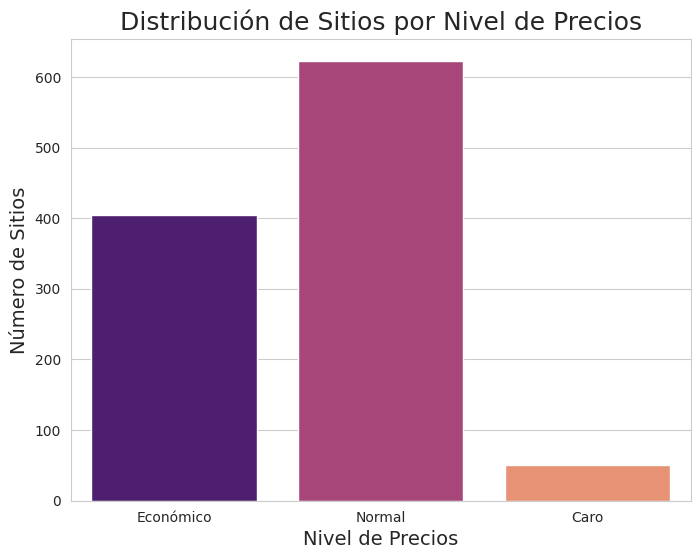

In [134]:
# --- Gr√°fico 2: Distribuci√≥n del Nivel de Precios ---
# Pregunta: ¬øQu√© nivel socioecon√≥mico predomina en la oferta tur√≠stica de Cali?
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df_eda,
    x='nivel_precios',
    order=['Econ√≥mico', 'Normal', 'Caro'],
    palette="magma"
)
plt.title('Distribuci√≥n de Sitios por Nivel de Precios')
plt.xlabel('Nivel de Precios')
plt.ylabel('N√∫mero de Sitios')
plt.show()

In [135]:
# --- Gr√°fico 3 y 4: Proporci√≥n de Accesibilidad y Reservas ---
# Preguntas: ¬øQu√© tan inclusiva es la ciudad? ¬øEs com√∫n poder reservar?

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('An√°lisis de Facilidades para el Turista', fontsize=20)

# Gr√°fico de Entrada Accesible
accesible_counts = df_eda['entrada_accesible'].value_counts(dropna=False)
accesible_counts.index = accesible_counts.index.map({True: 'S√≠', False: 'No', pd.NA: 'Sin Informaci√≥n'})
axes[0].pie(accesible_counts, labels=accesible_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('summer'))
axes[0].set_title('Proporci√≥n de Sitios con Entrada Accesible')

# Gr√°fico de Reservas
reservable_counts = df_eda['es_reservable'].value_counts(dropna=False)
reservable_counts.index = reservable_counts.index.map({True: 'S√≠', False: 'No', pd.NA: 'Sin Informaci√≥n'})
axes[1].pie(reservable_counts, labels=reservable_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('autumn'))
axes[1].set_title('Proporci√≥n de Sitios que Permiten Reservar')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [136]:
# --- Gr√°fico 5: D√≠as de Apertura de los Negocios ---
# Pregunta: ¬øCu√°les son los d√≠as m√°s activos para los negocios en Cali?

# Calculamos el n√∫mero de negocios abiertos por d√≠a
dias_semana = ['abre_lunes', 'abre_martes', 'abre_miercoles', 'abre_jueves', 'abre_viernes', 'abre_sabado', 'abre_domingo', 'abierto_24h']
conteo_apertura_por_dia = df_eda[dias_semana].sum().sort_values(ascending=False)

# Creamos etiquetas m√°s legibles
conteo_apertura_por_dia.index = ['Lunes', 'Martes', 'Mi√©rcoles', 'Jueves', 'Viernes', 'S√°bado', 'Domingo', '24/7']

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=conteo_apertura_por_dia.index, y=conteo_apertura_por_dia.values, palette='crest')

# A√±adir porcentajes sobre las barras (calculado sobre el total de sitios con informaci√≥n de horarios)
total_con_horario = len(df_eda[dias_semana].dropna())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{100 * height / total_con_horario:.1f}%', ha="center")

plt.title('N√∫mero de Negocios Abiertos por D√≠a de la Semana')
plt.xlabel('D√≠a de la Semana')
plt.ylabel('N√∫mero de Sitios Abiertos')
plt.ylim(0, conteo_apertura_por_dia.max() * 1.1) # Damos un poco de espacio extra arriba
plt.show()

/tmp/ipykernel_40802/1672098900.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo_apertura_por_dia.index, y=conteo_apertura_por_dia.values, palette='crest')


2025-10-08 23:29:45,017 - INFO - Generando la matriz de correlaci√≥n para las variables num√©ricas y booleanas.
2025-10-08 23:29:45,024 - INFO - Datos preparados para el c√°lculo de la correlaci√≥n.
2025-10-08 23:29:45,029 - INFO - Matriz de correlaci√≥n calculada.


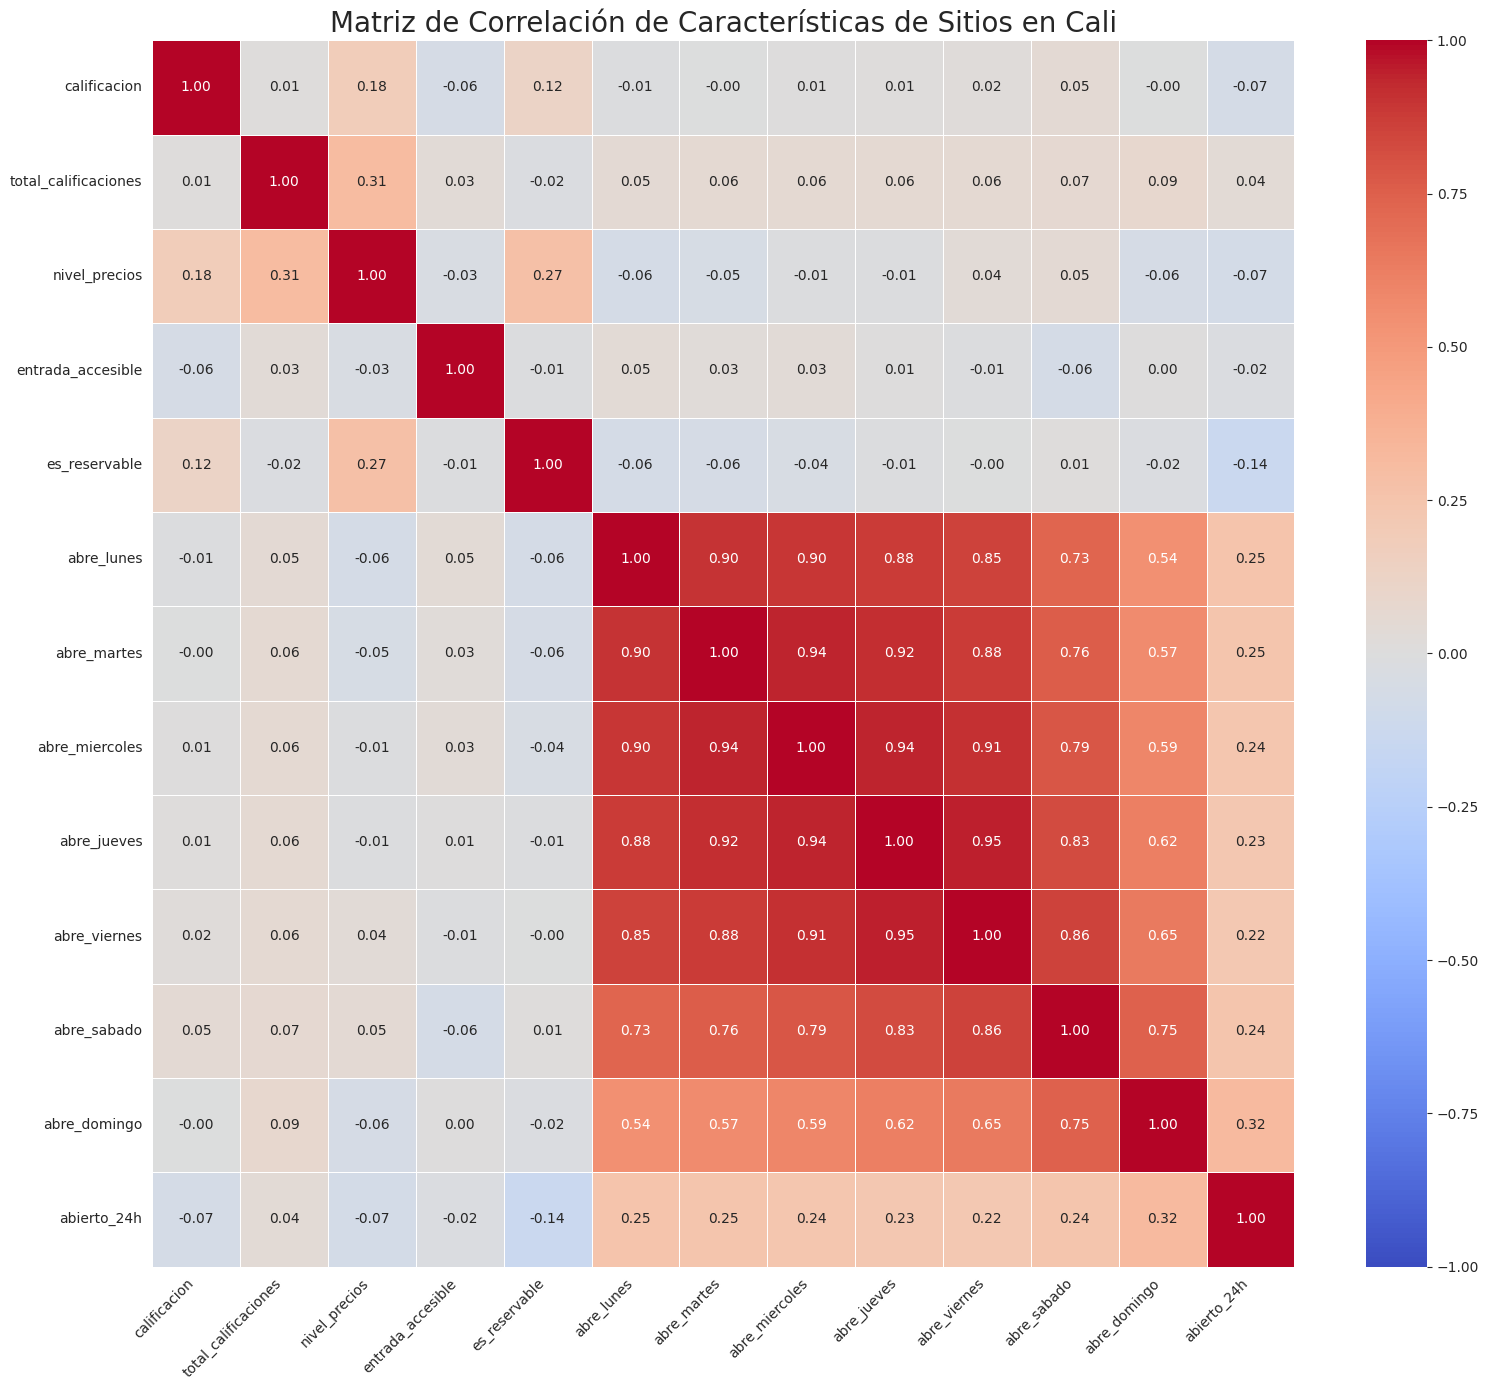

In [137]:
# --- Celda: Matriz de Correlaci√≥n (CORREGIDA) ---
logging.info("Generando la matriz de correlaci√≥n para las variables num√©ricas y booleanas.")

# --- 1. Preparaci√≥n de Datos para la Correlaci√≥n ---

columnas_para_correlacion = [
    'calificacion', 'total_calificaciones', 'nivel_precios',
    'entrada_accesible', 'es_reservable', 'abre_lunes', 'abre_martes', 
    'abre_miercoles', 'abre_jueves', 'abre_viernes', 'abre_sabado', 
    'abre_domingo', 'abierto_24h'
]
df_corr = df_eda[columnas_para_correlacion].copy()

# Para 'nivel_precios', usamos .cat.codes para obtener una representaci√≥n num√©rica (NaN -> -1)
# y luego reemplazamos -1 por un NaN num√©rico (np.nan) para la correlaci√≥n.
df_corr['nivel_precios'] = df_corr['nivel_precios'].cat.codes.replace(-1, np.nan)

# --- SOLUCI√ìN AQU√ç ---
# Convertimos expl√≠citamente las columnas booleanas a tipo 'float'.
# Esto convierte True -> 1.0, False -> 0.0, y pd.NA -> np.nan, que .corr() s√≠ entiende.
for col in df_corr.select_dtypes(include='boolean').columns:
    df_corr[col] = df_corr[col].astype('float')

logging.info("Datos preparados para el c√°lculo de la correlaci√≥n.")


# --- 2. C√°lculo de la Matriz de Correlaci√≥n ---
# Ahora el c√°lculo funcionar√° sin problemas.
corr_matrix = df_corr.corr()
logging.info("Matriz de correlaci√≥n calculada.")


# --- 3. Visualizaci√≥n con un Heatmap (sin cambios) ---
plt.figure(figsize=(16, 14))
sns.heatmap(
    corr_matrix, 
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=.5,
    vmin=-1,
    vmax=1
)

plt.title('Matriz de Correlaci√≥n de Caracter√≠sticas de Sitios en Cali', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### EDA graficas bivariado

/tmp/ipykernel_40802/1978924660.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


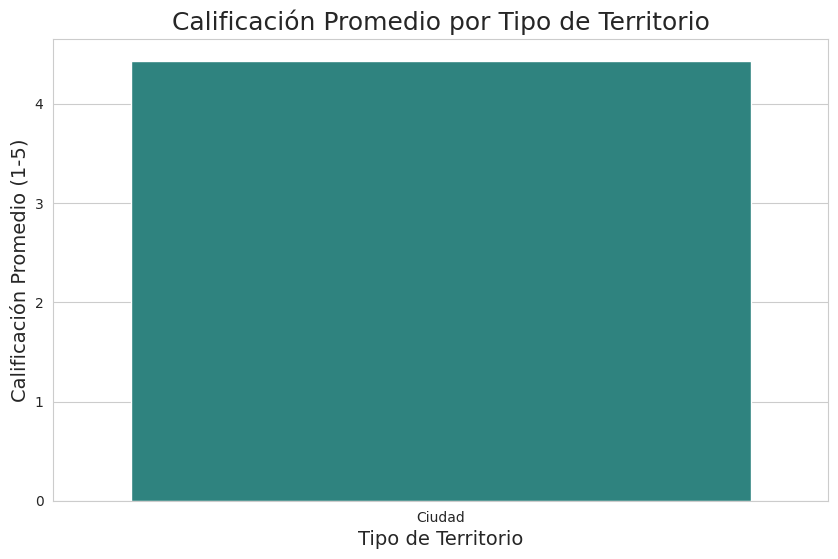

In [138]:
# --- Gr√°fico: Calificaci√≥n Promedio por Tipo de Territorio ---
# Pregunta: ¬øQu√© tipo de territorio (ciudad, pueblo) tiene la mejor calificaci√≥n promedio?

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_eda,
    x='tipo_territorio',
    y='calificacion',
    palette='viridis',
    estimator=np.mean, # Calculamos el promedio
    errorbar=None # Quitamos las barras de error para mayor claridad
)
plt.title('Calificaci√≥n Promedio por Tipo de Territorio')
plt.xlabel('Tipo de Territorio')
plt.ylabel('Calificaci√≥n Promedio (1-5)')
plt.show()

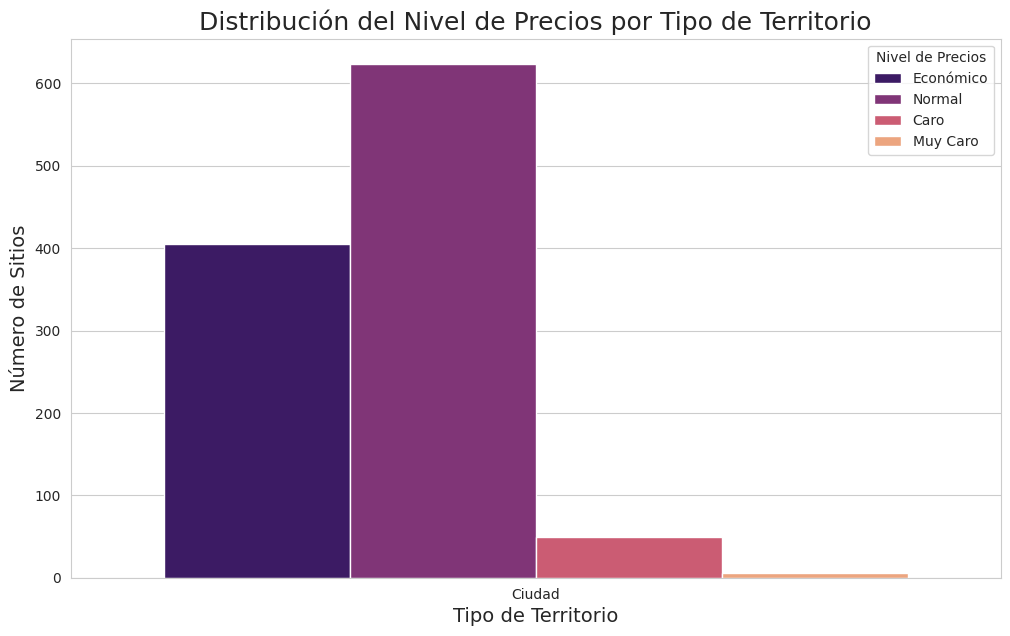

In [139]:
# --- Gr√°fico: Distribuci√≥n de Nivel de Precios por Tipo de Territorio ---
# Pregunta: ¬øQu√© tan econ√≥mico es visitar cada tipo de territorio?

plt.figure(figsize=(12, 7))
sns.countplot(
    data=df_eda,
    x='tipo_territorio',
    hue='nivel_precios',
    hue_order=['Econ√≥mico', 'Normal', 'Caro', 'Muy Caro'],
    palette='magma'
)
plt.title('Distribuci√≥n del Nivel de Precios por Tipo de Territorio')
plt.xlabel('Tipo de Territorio')
plt.ylabel('N√∫mero de Sitios')
plt.legend(title='Nivel de Precios')
plt.show()

In [140]:
# --- Celda 3 (Mejorada): Mapa de Calor Geoespacial INTERACTIVO con Folium ---
import folium
from folium.plugins import HeatMap

# Pregunta: ¬øEn qu√© zonas de Cali se concentran los puntos de inter√©s?

logging.info("Generando mapa de calor geoespacial interactivo con Folium.")

# 1. Preparar los datos: Folium HeatMap necesita una lista de [latitud, longitud].
# Nos aseguramos de eliminar las filas donde falten las coordenadas.
heat_data = df_eda[['latitud', 'longitud']].dropna().values.tolist()

# 2. Crear un mapa base centrado en Cali.
# He usado las coordenadas aproximadas del centro de la ciudad.
# zoom_start=12 te da una buena vista general de la ciudad.
mapa_cali = folium.Map(location=[3.4516, -76.5320], zoom_start=12)

# 3. Crear y a√±adir la capa del mapa de calor sobre el mapa base.
# Puedes jugar con los valores de 'radius' y 'blur' para ajustar la apariencia del calor.
HeatMap(heat_data, radius=15, blur=20).add_to(mapa_cali)

logging.info("Mapa base y capa de calor creados.")

# 4. Mostrar el mapa.
# En un Jupyter Notebook, al llamar a la variable del mapa al final de la celda, este se renderizar√°.
print("--- Mapa Interactivo de Densidad de Sitios en Cali ---")
display(mapa_cali)

ModuleNotFoundError: No module named 'folium'

In [ ]:
# --- Gr√°fico: Relaci√≥n entre Calificaci√≥n y Nivel de Precios ---
# Pregunta: ¬øLos lugares m√°s caros est√°n mejor calificados?

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_eda,
    x='nivel_precios',
    y='calificacion',
    order=['Econ√≥mico', 'Normal', 'Caro'],
    palette='plasma'
)
plt.title('Distribuci√≥n de Calificaciones por Nivel de Precios')
plt.xlabel('Nivel de Precios')
plt.ylabel('Calificaci√≥n')
plt.show()

In [ ]:
# --- Celda 5 (Corregida): Calificaci√≥n vs. Accesibilidad y Reservas ---
# Preguntas: ¬øSon m√°s populares los sitios accesibles? ¬øInfluye la reserva en la calificaci√≥n?

fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)
fig.suptitle('Impacto de las Facilidades en la Calificaci√≥n', fontsize=20)

# --- SOLUCI√ìN: Usamos .dropna() para eliminar filas con valores nulos en las columnas graficadas ---
# Esto evita el error de comparaci√≥n ambigua con pd.NA.
df_plot_accesible = df_eda.dropna(subset=['entrada_accesible', 'calificacion'])
df_plot_reservable = df_eda.dropna(subset=['es_reservable', 'calificacion'])


# Gr√°fico para Entrada Accesible
sns.violinplot(
    ax=axes[0],
    data=df_plot_accesible,
    x='entrada_accesible',
    y='calificacion',
    palette='summer'
)
axes[0].set_title('Calificaci√≥n vs. Entrada Accesible')
axes[0].set_xlabel('¬øTiene Entrada Accesible?')

# Gr√°fico para Reservas
sns.violinplot(
    ax=axes[1],
    data=df_plot_reservable,
    x='es_reservable',
    y='calificacion',
    palette='autumn'
)
axes[1].set_title('Calificaci√≥n vs. Posibilidad de Reservar')
axes[1].set_xlabel('¬øSe Puede Reservar?')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# --- Gr√°fico: Calificaci√≥n por Disponibilidad Semanal ---
# Pregunta: ¬øTienen mejor calificaci√≥n los lugares que abren m√°s d√≠as?

# 1. Crear categor√≠as de disponibilidad
def categorizar_apertura(row):
    # Manejo expl√≠cito de valores NA para evitar el TypeError
    if pd.notna(row['abierto_24h']) and row['abierto_24h']:
        return 'Abierto 24/7'
    
    # SOLUCI√ìN PARA ELIMINAR EL FUTUREWARNING de "Downcasting":
    # Convertimos expl√≠citamente a tipo num√©rico antes de sumar.
    # fillna(False) convierte los NA a False, y .astype(int) convierte True->1 y False->0.
    dias_laborables = row[['abre_lunes', 'abre_martes', 'abre_miercoles', 'abre_jueves']].fillna(False).astype(int).sum()
    fin_de_semana = row[['abre_viernes', 'abre_sabado', 'abre_domingo']].fillna(False).astype(int).sum()
    
    if dias_laborables >= 4 and fin_de_semana >= 2:
        return 'Todos los D√≠as'
    elif fin_de_semana >= 2:
        return 'Fines de Semana'
    elif dias_laborables >= 4:
        return 'Solo entre Semana'
    else:
        return 'Horario Limitado'

df_eda['disponibilidad_semanal'] = df_eda.apply(categorizar_apertura, axis=1).astype('category')

# 2. Graficar
plt.figure(figsize=(12, 7))

# SOLUCI√ìN PARA ELIMINAR EL FUTUREWARNING de "palette":
# Asignamos la variable 'x' tambi√©n a 'hue' y desactivamos la leyenda.
sns.boxplot(
    data=df_eda,
    x='disponibilidad_semanal',
    y='calificacion',
    hue='disponibilidad_semanal', # <-- Cambio aqu√≠
    legend=False,                 # <-- Cambio aqu√≠
    order=['Solo entre Semana', 'Fines de Semana', 'Todos los D√≠as', 'Abierto 24/7', 'Horario Limitado'],
    palette='coolwarm'
)

plt.title('Distribuci√≥n de Calificaci√≥n por Disponibilidad Semanal')
plt.xlabel('Disponibilidad')
plt.ylabel('Calificaci√≥n')
plt.show()

In [ ]:
# --- Gr√°fico: Total de Calificaciones vs. Nivel de Precios ---
# Pregunta: ¬øReciben m√°s calificaciones los lugares econ√≥micos?

plt.figure(figsize=(10, 7))
sns.barplot(
    data=df_eda,
    x='nivel_precios',
    y='total_calificaciones',
    order=['Econ√≥mico', 'Normal', 'Caro'],
    palette='mako',
    estimator=np.mean
)
plt.title('Promedio de Calificaciones Recibidas por Nivel de Precios')
plt.xlabel('Nivel de Precios')
plt.ylabel('N√∫mero Promedio de Calificaciones')
plt.show()

### EDA graficas multivariado

In [ ]:
# --- Celda: Preparaci√≥n del DataFrame para An√°lisis de Tags ("Explode") ---
logging.info("Creando un DataFrame 'explotado' para el an√°lisis detallado de tags.")

# Copiamos para no modificar el df_eda principal
df_tags_eda = df_eda.copy()

# Convertimos la columna 'tags' (que es string) a listas reales de Python
df_tags_eda['tags'] = df_tags_eda['tags'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Usamos .explode() para duplicar las filas por cada tag en la lista
df_tags_eda = df_tags_eda.explode('tags')

logging.info(f"DataFrame 'explotado' creado. Ahora tiene {len(df_tags_eda)} filas.")
print("Vista previa del DataFrame con tags individuales:")
display(df_tags_eda[['nombre', 'tags']].head(20))

In [ ]:
# Obtener la lista de tags √∫nicos
unique_tags = df_tags_eda['tags'].unique().tolist()

# Imprimir la cantidad de tags √∫nicos y la lista completa
print(f"Se encontraron {len(unique_tags)} categor√≠as √∫nicas en total.")
print("\n--- Lista de Todas las Categor√≠as √önicas ---")
# Usamos sorted() para que la lista sea m√°s f√°cil de leer
print(unique_tags)

In [ ]:
# --- Celda: Mapeo de Tags a Categor√≠as Principales ---
import pandas as pd
import ast

# Aseg√∫rate de que df_eda est√© disponible y contenga la columna 'tags'
# Si no, carga tu dataset aqu√≠. df_tags_eda ya est√° explotado.

logging.info("Iniciando la creaci√≥n de categor√≠as principales a partir de los tags.")

# Diccionario para mapear tags espec√≠ficos a categor√≠as generales
# A√±adimos la categor√≠a 'Servicios y Otros' para clasificar el resto.
tag_to_category_map = {
    # Gastronomia
    'food': 'Gastronomia', 'restaurant': 'Gastronomia', 'meal_delivery': 'Gastronomia',
    'cafe': 'Gastronomia', 'bakery': 'Gastronomia', 'meal_takeaway': 'Gastronomia',
    'grocery_or_supermarket': 'Gastronomia', 'supermarket': 'Gastronomia', 'liquor_store': 'Gastronomia',
    'bar': 'Gastronomia',

    # Alojamiento
    'lodging': 'Alojamiento', 'campground': 'Alojamiento', 'rv_park': 'Alojamiento',
    
    # Cultural y Entretenimiento
    'art_gallery': 'Cultural y Entretenimiento', 'museum': 'Cultural y Entretenimiento', 
    'tourist_attraction': 'Cultural y Entretenimiento', 'church': 'Cultural y Entretenimiento',
    'place_of_worship': 'Cultural y Entretenimiento', 'zoo': 'Cultural y Entretenimiento',
    'amusement_park': 'Cultural y Entretenimiento', 'casino': 'Cultural y Entretenimiento',
    'movie_theater': 'Cultural y Entretenimiento', 'night_club': 'Cultural y Entretenimiento',
    'library': 'Cultural y Entretenimiento',

    # Naturaleza y Recreaci√≥n
    'park': 'Naturaleza y Recreaci√≥n',
    
    # Comercio y Compras
    'store': 'Comercio y Compras', 'point_of_interest': 'Comercio y Compras', 
    'shopping_mall': 'Comercio y Compras', 'department_store': 'Comercio y Compras',
    'home_goods_store': 'Comercio y Compras', 'clothing_store': 'Comercio y Compras',
    'book_store': 'Comercio y Compras', 'convenience_store': 'Comercio y Compras',
    'hardware_store': 'Comercio y Compras', 'jewelry_store': 'Comercio y Compras',
    'furniture_store': 'Comercio y Compras', 'florist': 'Comercio y Compras',
    'electronics_store': 'Comercio y Compras', 'storage': 'Comercio y Compras',
    
    # Servicios y Otros
    'health': 'Servicios y Otros', 'physiotherapist': 'Servicios y Otros', 
    'beauty_salon': 'Servicios y Otros', 'hair_care': 'Servicios y Otros', 'spa': 'Servicios y Otros',
    'gym': 'Servicios y Otros', 'doctor': 'Servicios y Otros', 'hospital': 'Servicios y Otros',
    'school': 'Servicios y Otros', 'travel_agency': 'Servicios y Otros', 'real_estate_agency': 'Servicios y Otros',
    'parking': 'Servicios y Otros', 'atm': 'Servicios y Otros', 'finance': 'Servicios y Otros',
    'bank': 'Servicios y Otros', 'local_government_office': 'Servicios y Otros',
    'establishment': 'Servicios y Otros', 'general_contractor': 'Servicios y Otros',
    'neighborhood': 'Servicios y Otros', 'political': 'Servicios y Otros'
}

# Aplicamos el mapeo para crear la nueva columna
df_tags_eda['categoria_principal'] = df_tags_eda['tags'].map(tag_to_category_map).fillna('Indefinido')

logging.info("Columna 'categoria_principal' creada exitosamente.")
print("Vista previa del DataFrame con la nueva categor√≠a principal:")
display(df_tags_eda[['nombre', 'tags', 'categoria_principal']].head(10))

In [ ]:
# --- Celda 4: Saneamiento de Datos (Versi√≥n Final Definitiva y a Prueba de Fallos) ---
import pandas as pd
import ast
import html
import numpy as np

logging.info("Iniciando el saneamiento de datos (versi√≥n definitiva) para el mapa.")

# 1. Agrupar los datos (sin cambios)
df_mapa_agrupado = df_tags_eda.groupby(['nombre', 'latitud', 'longitud']).agg({
    'categoria_principal': lambda x: list(x.unique()),
    'calificacion': 'first',
    'total_calificaciones': 'first',
    'nivel_precios': 'first',
    'tipo_telefono': 'first'
}).reset_index()

df_mapa_saneado = df_mapa_agrupado.copy()

# --- INICIO DE LA LIMPIEZA AGRESIVA ---

# 2. Eliminar filas con coordenadas no v√°lidas o nulas
df_mapa_saneado.dropna(subset=['latitud', 'longitud'], inplace=True)
df_mapa_saneado['latitud'] = pd.to_numeric(df_mapa_saneado['latitud'], errors='coerce')
df_mapa_saneado['longitud'] = pd.to_numeric(df_mapa_saneado['longitud'], errors='coerce')
df_mapa_saneado.dropna(subset=['latitud', 'longitud'], inplace=True)

# 3. Eliminar filas con nombres vac√≠os o nulos
df_mapa_saneado.dropna(subset=['nombre'], inplace=True)
df_mapa_saneado = df_mapa_saneado[df_mapa_saneado['nombre'].str.strip() != '']

# 4. Limpieza exhaustiva de 'categoria_principal'
df_mapa_saneado['categoria_principal'] = df_mapa_saneado['categoria_principal'].apply(
    lambda categorias: [cat for cat in categorias if pd.notna(cat) and cat != 'Indefinido']
)
df_mapa_saneado = df_mapa_saneado[df_mapa_saneado['categoria_principal'].apply(len) > 0]

# 5. Funci√≥n para limpiar texto para HTML/JS
def limpiar_texto_para_mapa(texto):
    if not isinstance(texto, str):
        texto = str(texto)
    return html.escape(texto, quote=True)

# 6. Saneamiento de las columnas restantes
df_mapa_saneado['categoria_principal_str'] = df_mapa_saneado['categoria_principal'].apply(
    lambda x: limpiar_texto_para_mapa(', '.join(map(str, x)))
)
columnas_texto = ['nombre', 'nivel_precios', 'tipo_telefono']
for col in columnas_texto:
    if col in df_mapa_saneado.columns:
        df_mapa_saneado[col] = df_mapa_saneado[col].astype(object).fillna('N/A').apply(limpiar_texto_para_mapa)

columnas_num = ['calificacion', 'total_calificaciones']
for col in columnas_num:
    if col in df_mapa_saneado.columns:
        df_mapa_saneado[col] = pd.to_numeric(df_mapa_saneado[col], errors='coerce').fillna(0) # Rellenamos con 0 para evitar errores

logging.info("Saneamiento de datos definitivo completado.")
print("Vista previa del DataFrame final para el mapa:")
display(df_mapa_saneado.head())

print(f"\nEl DataFrame final tiene {len(df_mapa_saneado)} puntos de inter√©s √∫nicos y v√°lidos para mapear.")

In [ ]:
# --- Celda 5: Mapa Geoespacial Interactivo (Versi√≥n Final y Funcional) ---
import folium
from folium.plugins import MarkerCluster
import pandas as pd

logging.info("Generando mapa interactivo con cl√∫steres anidados en capas controlables.")

# 1. Crear un mapa base
mapa_final_cali = folium.Map(
    location=[3.4516, -76.5320], 
    zoom_start=13,
    tiles="cartodbpositron"
)

# 2. Definir colores
colores_validos = {
    'Gastronomia': 'red', 'Alojamiento': 'blue', 'Cultural y Entretenimiento': 'purple',
    'Naturaleza y Recreaci√≥n': 'green', 'Comercio y Compras': 'orange',
    'Servicios y Otros': 'gray'
}

# 3. Crear un FeatureGroup para cada categor√≠a. Esta ser√° la capa visible en el control.
categorias_unicas_finales = df_mapa_saneado['categoria_principal'].explode().unique()
capas_de_categoria = {}

for categoria in categorias_unicas_finales:
    # Creamos la capa principal que el usuario podr√° activar/desactivar
    # y la a√±adimos al mapa.
    capas_de_categoria[categoria] = folium.FeatureGroup(name=categoria, show=True).add_to(mapa_final_cali)

# 4. Iterar sobre los datos SANEADOS y a√±adir marcadores a la capa correcta
#for idx, row in df_mapa_saneado.iterrows():
 #   popup_html = f"""
  #  <b>Nombre:</b> {row['nombre'].title()}<br>
   # <b>Categor√≠as:</b> {row['categoria_principal_str']}<br>
#    <b>Calificaci√≥n:</b> {row['calificacion'] if pd.notna(row['calificacion']) else 'N/A'}<br>
 #   <b>Total Calificaciones:</b> {int(row['total_calificaciones']) if pd.notna(row['total_calificaciones']) else 'N/A'}
  #  """
   # popup = folium.Popup(folium.IFrame(popup_html, width=250, height=100))
#    
 #   # Un lugar puede pertenecer a m√∫ltiples categor√≠as
  #  for categoria in row['categoria_principal']:
   #     if categoria in capas_de_categoria:
    #        # A√±adimos el marcador directamente al FeatureGroup de su categor√≠a
     #       folium.Marker(
      #          location=[row['latitud'], row['longitud']],
       #         popup=popup,
        #        tooltip=row['nombre'].title(),
         #       icon=folium.Icon(color=colores_validos.get(categoria, 'lightgray'))
          #  ).add_to(capas_de_categoria[categoria])

# --- MEJORA DE RENDIMIENTO OPCIONAL PERO RECOMENDADA ---
# # Si tienes muchos marcadores y el mapa se siente lento, puedes a√±adir un MarkerCluster a cada capa
# # Descomenta las siguientes l√≠neas y comenta el bloque 4 si es necesario.
#
marker_clusters = {}
for categoria in categorias_unicas_finales:
    fg = folium.FeatureGroup(name=categoria, show=True).add_to(mapa_final_cali)
    cluster = MarkerCluster().add_to(fg)
    marker_clusters[categoria] = cluster

for idx, row in df_mapa_saneado.iterrows():
    popup = folium.Popup(f"<b>{row['nombre'].title()}</b>")
    for categoria in row['categoria_principal']:
        if categoria in marker_clusters:
            folium.Marker(
                location=[row['latitud'], row['longitud']],
                popup=popup,
                tooltip=row['nombre'].title(),
                icon=folium.Icon(color=colores_validos.get(categoria, 'lightgray'))
            ).add_to(marker_clusters[categoria])


# 5. A√±adir el control de capas al final
folium.LayerControl().add_to(mapa_final_cali)

# 6. Guardar el mapa
mapa_final_cali.save('mapa_final_cali_funcional.html')

logging.info("Mapa interactivo final guardado.")
print("--- Mapa guardado. Por favor, abre 'mapa_final_cali_funcional.html' en tu navegador. ---")

# 7. Mostrar el mapa
mapa_final_cali

In [ ]:
'''
# --- Celda de Depuraci√≥n: Ejemplo M√≠nimo y Aislado ---
import folium
from folium.plugins import MarkerCluster

print("Ejecutando una prueba con un dataset m√≠nimo para diagnosticar el problema...")

# 1. Crear un mapa base limpio
mapa_de_prueba = folium.Map(location=[3.4516, -76.5320], zoom_start=13, tiles="cartodbpositron")

# 2. Datos de prueba simples y perfectos
datos_de_prueba = [
    {'lat': 3.4516, 'lon': -76.5320, 'nombre': 'Restaurante Central', 'categoria': 'Gastronomia'},
    {'lat': 3.4520, 'lon': -76.5330, 'nombre': 'Parrilla del Centro', 'categoria': 'Gastronomia'},
    {'lat': 3.4600, 'lon': -76.5200, 'nombre': 'Museo de la Ciudad', 'categoria': 'Cultural'},
    {'lat': 3.4610, 'lon': -76.5210, 'nombre': 'Teatro Municipal', 'categoria': 'Cultural'},
    {'lat': 3.4400, 'lon': -76.5400, 'nombre': 'Hotel del R√≠o', 'categoria': 'Alojamiento'}
]

# 3. Crear un MarkerCluster para cada categor√≠a y a√±adirlo al mapa
categorias_prueba = ['Gastronomia', 'Cultural', 'Alojamiento']
clusters_prueba = {}
for categoria in categorias_prueba:
    clusters_prueba[categoria] = MarkerCluster(name=categoria).add_to(mapa_de_prueba)

# 4. A√±adir los marcadores a su cl√∫ster correspondiente
for punto in datos_de_prueba:
    categoria_punto = punto['categoria']
    folium.Marker(
        location=[punto['lat'], punto['lon']],
        popup=f"<b>{punto['nombre']}</b><br>Categor√≠a: {categoria_punto}",
        icon=folium.Icon(color='red' if categoria_punto == 'Gastronomia' else 'blue' if categoria_punto == 'Alojamiento' else 'purple')
    ).add_to(clusters_prueba[categoria_punto])

# 5. A√±adir el control de capas al final
folium.LayerControl().add_to(mapa_de_prueba)

# 6. Guardar el mapa de prueba en un archivo HTML
mapa_de_prueba.save('mapa_de_prueba.html')
print("--- Mapa de prueba guardado en 'mapa_de_prueba.html'. Por favor, abre este archivo en tu navegador. ---")

# Mostrar el mapa de prueba
mapa_de_prueba
'''

In [ ]:
"""
# 2. Crear un mapa base centrado en Cali
mapa_cali_categorizado = folium.Map(
    location=[3.4516, -76.5320], 
    zoom_start=13, 
    tiles='CartoDB positron',
    width=800,  # Ancho en p√≠xeles
    height=600  # Alto en p√≠xeles
)
"""